## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
#@title
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
#mouting drive unit
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset - also creating a backup-copy of the original data
df_train = pd.read_csv("/content/drive/MyDrive/Study/MDS_UTexas/6_ModelTuning/ReneWind_Project/Train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Study/MDS_UTexas/6_ModelTuning/ReneWind_Project/Test.csv")

df_train_copy=df_train.copy()
df_test_copy=df_test.copy()

## Data Overview

- Observations
- Sanity checks

### Displaying the first and last 5 rows of the dataset

In [ ]:
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
df_train.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071,-1.088,-0.796,-3.012,-2.288,2.807,0.481,0.105,-0.587,-2.899,8.868,1.717,1.358,-1.777,0.710,4.945,-3.100,-1.199,-1.085,-0.365,3.131,-3.948,-3.578,-8.139,-1.937,-1.328,-0.403,-1.735,9.996,6.955,-3.938,-8.274,5.745,0.589,-0.650,-3.043,2.216,0.609,0.178,2.928,1
19996,2.890,2.483,5.644,0.937,-1.381,0.412,-1.593,-5.762,2.150,0.272,-2.095,-1.526,0.072,-3.540,-2.762,-10.632,-0.495,1.720,3.872,-1.210,-8.222,2.121,-5.492,1.452,1.450,3.685,1.077,-0.384,-0.839,-0.748,-1.089,-4.159,1.181,-0.742,5.369,-0.693,-1.669,3.660,0.820,-1.987,0
19997,-3.897,-3.942,-0.351,-2.417,1.108,-1.528,-3.520,2.055,-0.234,-0.358,-3.782,2.180,6.112,1.985,-8.330,-1.639,-0.915,5.672,-3.924,2.133,-4.502,2.777,5.728,1.620,-1.700,-0.042,-2.923,-2.760,-2.254,2.552,0.982,7.112,1.476,-3.954,1.856,5.029,2.083,-6.409,1.477,-0.874,0
19998,-3.187,-10.052,5.696,-4.370,-5.355,-1.873,-3.947,0.679,-2.389,5.457,1.583,3.571,9.227,2.554,-7.039,-0.994,-9.665,1.155,3.877,3.524,-7.015,-0.132,-3.446,-4.801,-0.876,-3.812,5.422,-3.732,0.609,5.256,1.915,0.403,3.164,3.752,8.530,8.451,0.204,-7.130,4.249,-6.112,0
19999,-2.687,1.961,6.137,2.600,2.657,-4.291,-2.344,0.974,-1.027,0.497,-9.589,3.177,1.055,-1.416,-4.669,-5.405,3.720,2.893,2.329,1.458,-6.429,1.818,0.806,7.786,0.331,5.257,-4.867,-0.819,-5.667,-2.861,4.674,6.621,-1.989,-1.349,3.952,5.450,-0.455,-2.202,1.678,-1.974,0


### Understand the shape of the dataset.

In [ ]:
print("train data set observations:",df_train.shape)
print("test data set observations:",df_test.shape)

train data set observations: (20000, 41)
test data set observations: (5000, 41)


* There are 20,000 observations and 41 columns in the training dataset
* There are 5,000 observations and 41 columns in the data dataset

### Check the data types of the columns for the dataset.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Observations-**
* All columns are float, with the exception of the target variable which is integer. In general all features are numeric.
* Only V1 and V2 seems to have a few missing values for train and test datasets
* We can observe that there are no missing values in the remaining features

### Summary of the dataset.

In [ ]:
df_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000,19982.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,-0.272,0.440,2.485,-0.083,-0.054,-0.995,-0.879,-0.548,-0.017,-0.013,-1.895,1.605,1.580,-0.951,-2.415,-2.925,-0.134,1.189,1.182,0.024,-3.611,0.952,-0.366,1.134,-0.002,1.874,-0.612,-0.883,-0.986,-0.016,0.487,0.304,0.050,-0.463,2.230,1.515,0.011,-0.344,0.891,-0.876,0.056
std,3.442,3.151,3.389,3.432,2.105,2.041,1.762,3.296,2.161,2.193,3.124,2.930,2.875,1.790,3.355,4.222,3.345,2.592,3.397,3.669,3.568,1.652,4.032,3.912,2.017,3.435,4.369,1.918,2.684,3.005,3.461,5.500,3.575,3.184,2.937,3.801,1.788,3.948,1.753,3.012,0.229
min,-11.876,-12.320,-10.708,-15.082,-8.603,-10.227,-7.950,-15.658,-8.596,-9.854,-14.832,-12.948,-13.228,-7.739,-16.417,-20.374,-14.091,-11.644,-13.492,-13.923,-17.956,-10.122,-14.866,-16.387,-8.228,-11.834,-14.905,-9.269,-12.579,-14.796,-13.723,-19.877,-16.898,-17.985,-15.350,-14.833,-5.478,-17.375,-6.439,-11.024,0.000
25%,-2.737,-1.641,0.207,-2.348,-1.536,-2.347,-2.031,-2.643,-1.495,-1.411,-3.922,-0.397,-0.224,-2.171,-4.415,-5.634,-2.216,-0.404,-1.050,-2.433,-5.930,-0.118,-3.099,-1.468,-1.365,-0.338,-3.652,-2.171,-2.787,-1.867,-1.818,-3.420,-2.243,-2.137,0.336,-0.944,-1.256,-2.988,-0.272,-2.940,0.000
50%,-0.748,0.472,2.256,-0.135,-0.102,-1.001,-0.917,-0.389,-0.068,0.101,-1.921,1.508,1.637,-0.957,-2.383,-2.683,-0.015,0.883,1.279,0.033,-3.533,0.975,-0.262,0.969,0.025,1.951,-0.885,-0.891,-1.176,0.184,0.490,0.052,-0.066,-0.255,2.099,1.567,-0.128,-0.317,0.919,-0.921,0.000
75%,1.840,2.544,4.566,2.131,1.340,0.380,0.224,1.723,1.409,1.477,0.119,3.571,3.460,0.271,-0.359,-0.095,2.069,2.572,3.493,2.512,-1.266,2.026,2.452,3.546,1.397,4.130,2.189,0.376,0.630,2.036,2.731,3.762,2.255,1.437,4.064,3.984,1.176,2.279,2.058,1.120,0.000
max,15.493,13.089,17.091,13.236,8.134,6.976,8.006,11.679,8.138,8.108,11.826,15.081,15.420,5.671,12.246,13.583,16.756,13.180,13.238,16.052,13.840,7.410,14.459,17.163,8.223,16.836,17.560,6.528,10.722,12.506,17.255,23.633,16.692,14.358,15.291,19.330,7.467,15.290,7.760,10.654,1.000


**Observations-**
* Generally speaking, can be observed that all 40 V variables are substantially spread at the left and right of their mean.
* It would be initially hard to say if there are outliers since we don't have knowledge of the meaning of each varialbe, V1 or V2, etc is not like age or blood presure for which we know there is a certaing valid range, so for now such appreciations will not be performed.
* We can observe that the mean and the median for most of the features are small values that can be negative or positive, for some of the variables, mean values tend to be substantially higher
* For all features, min is negative and max is positive
* At least 75% of the observations have a target value of 0, which means “No failure”

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

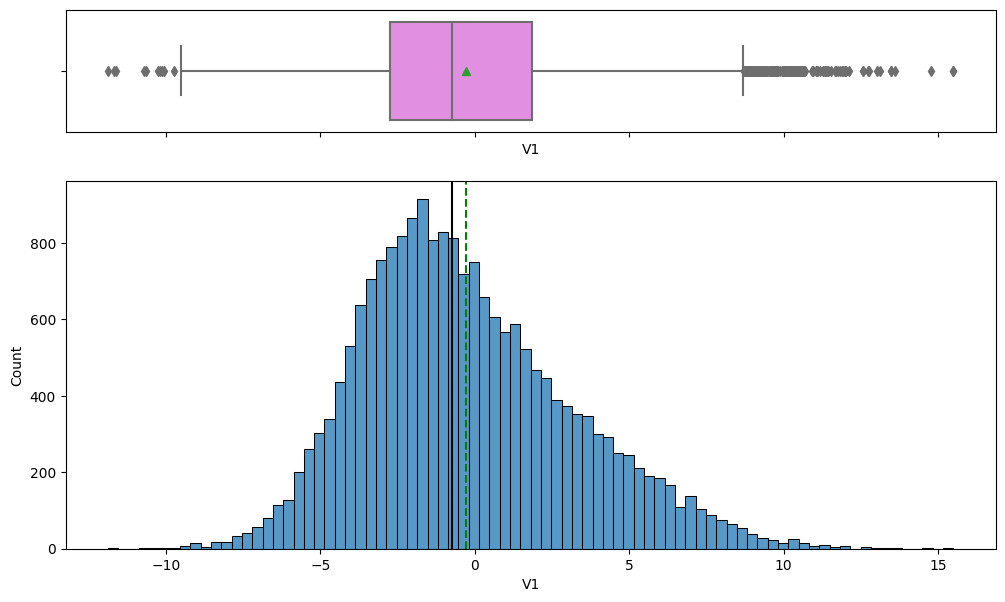

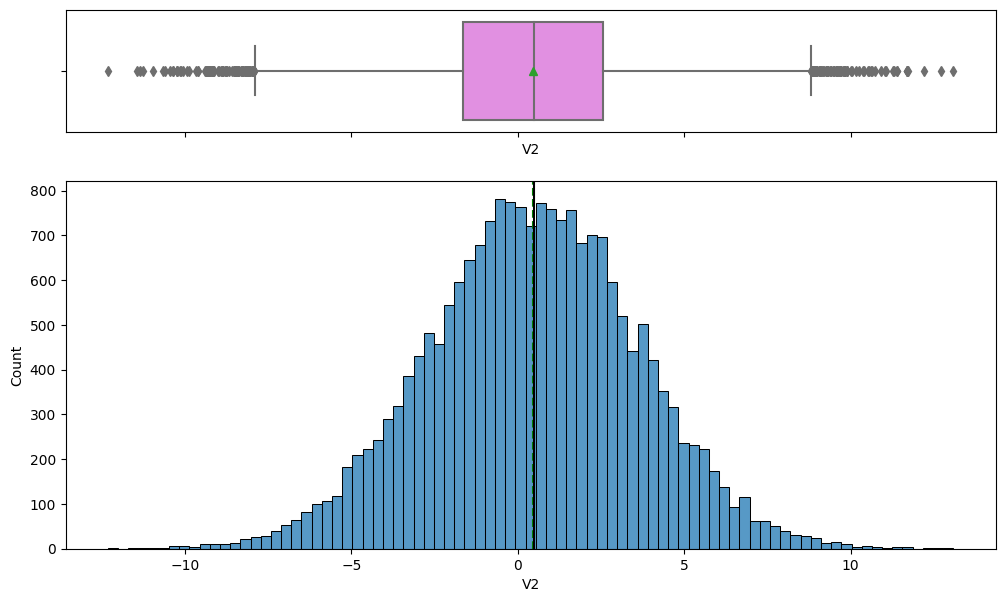

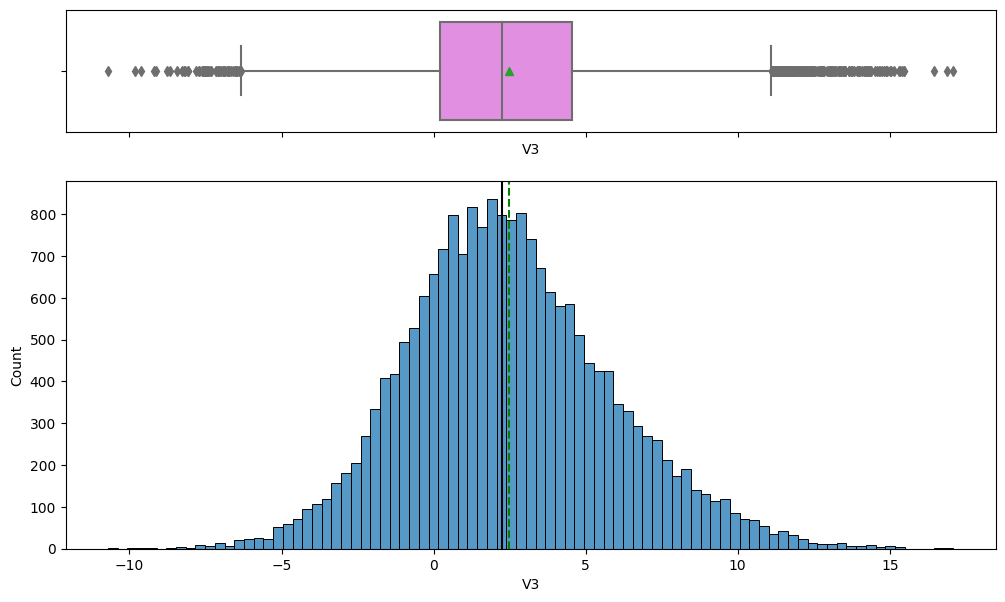

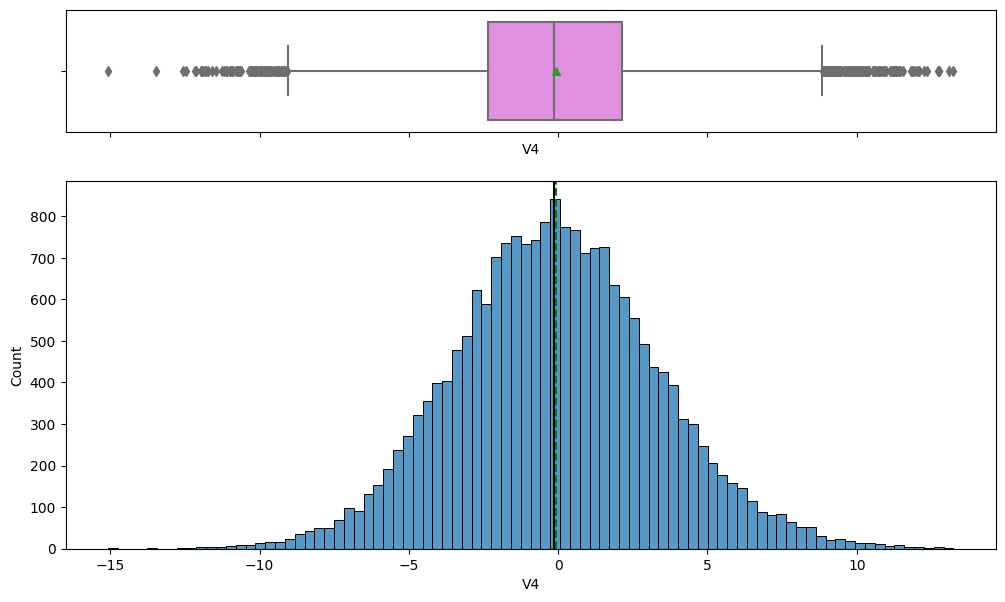

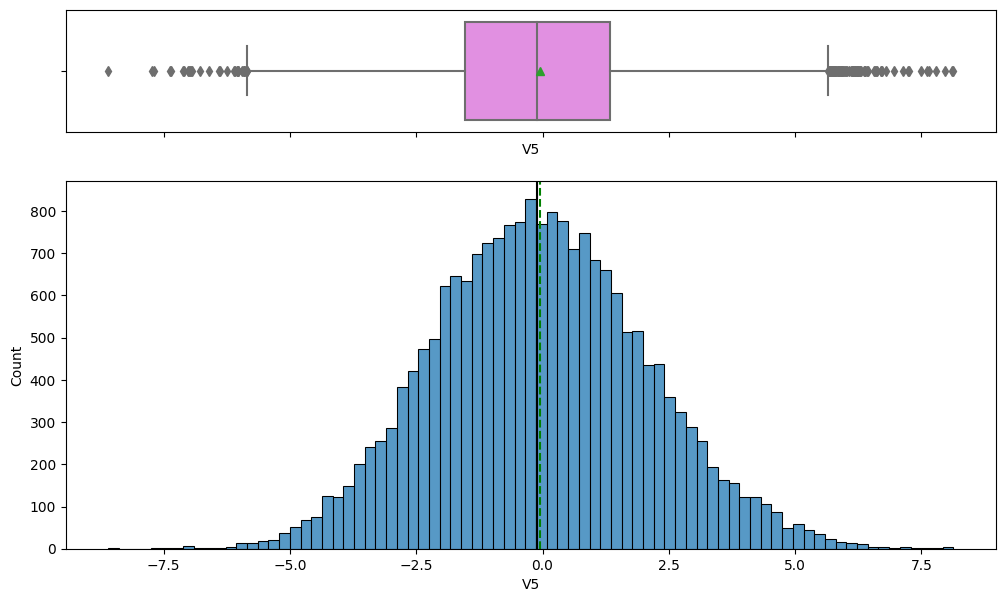

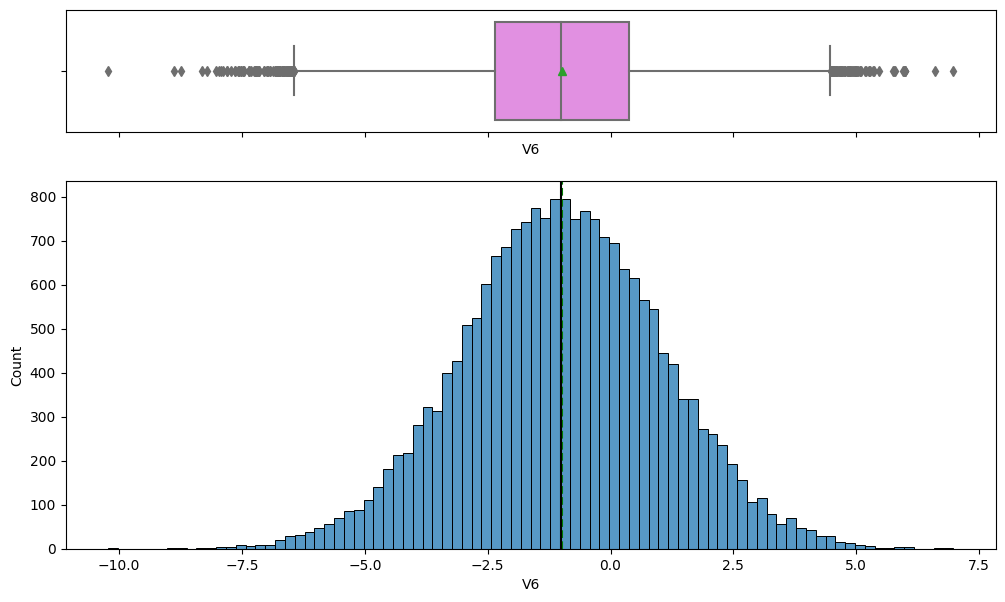

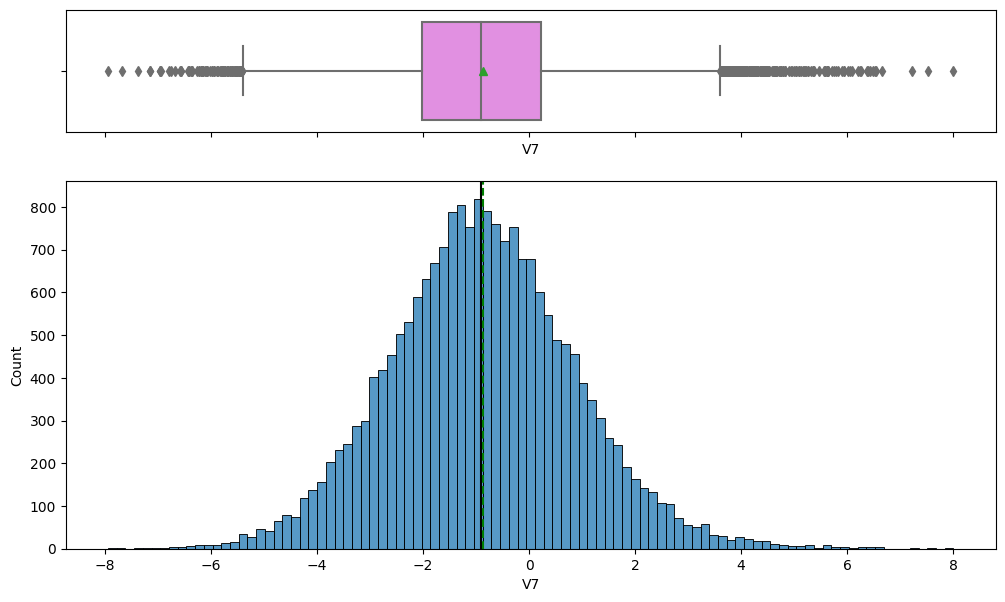

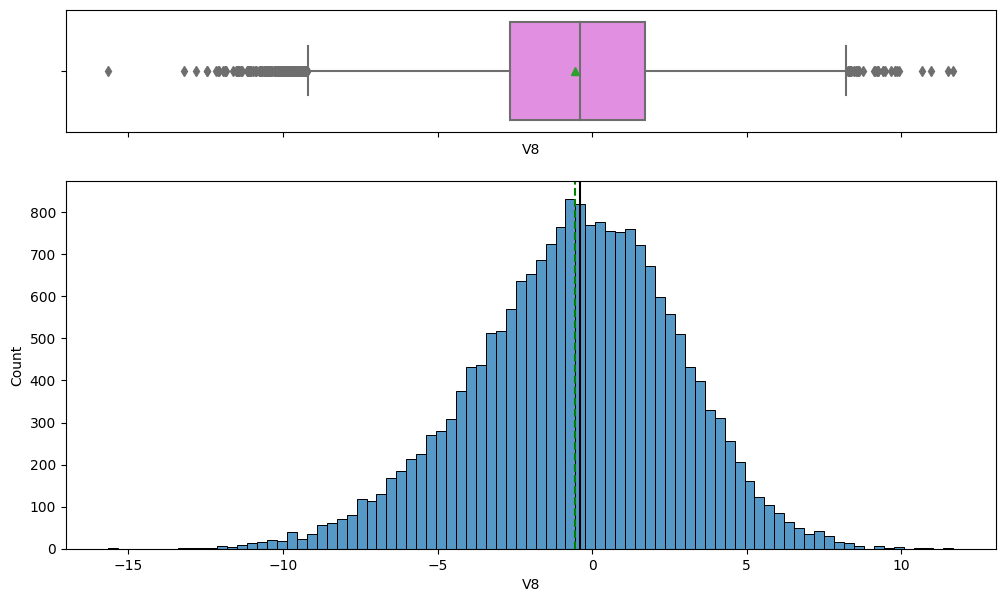

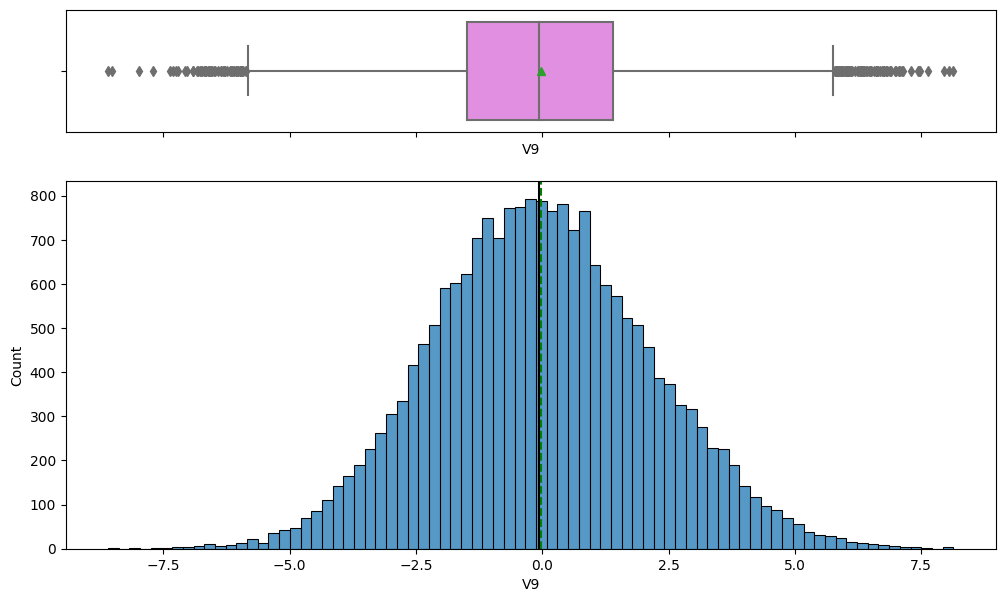

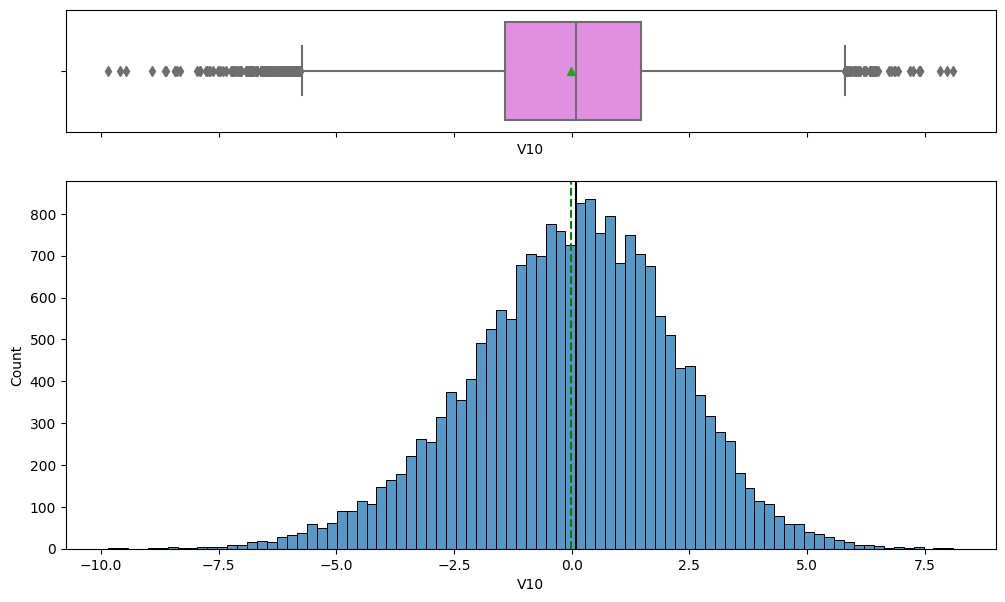

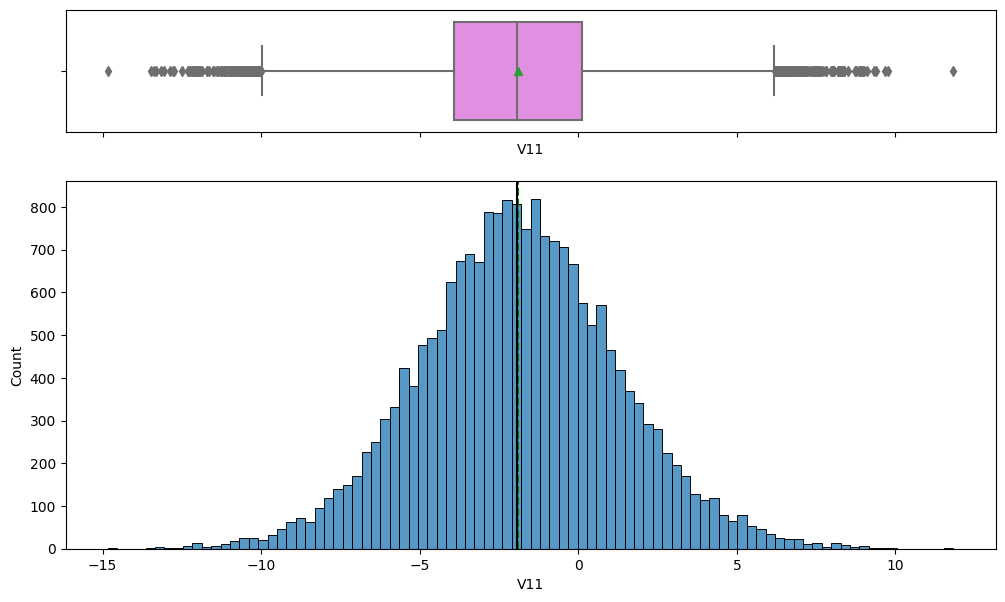

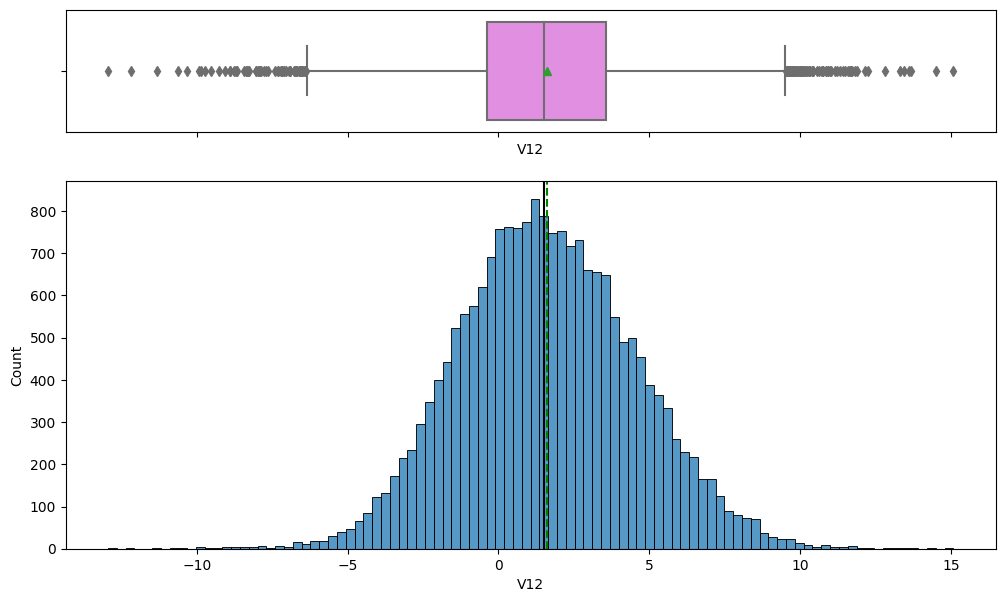

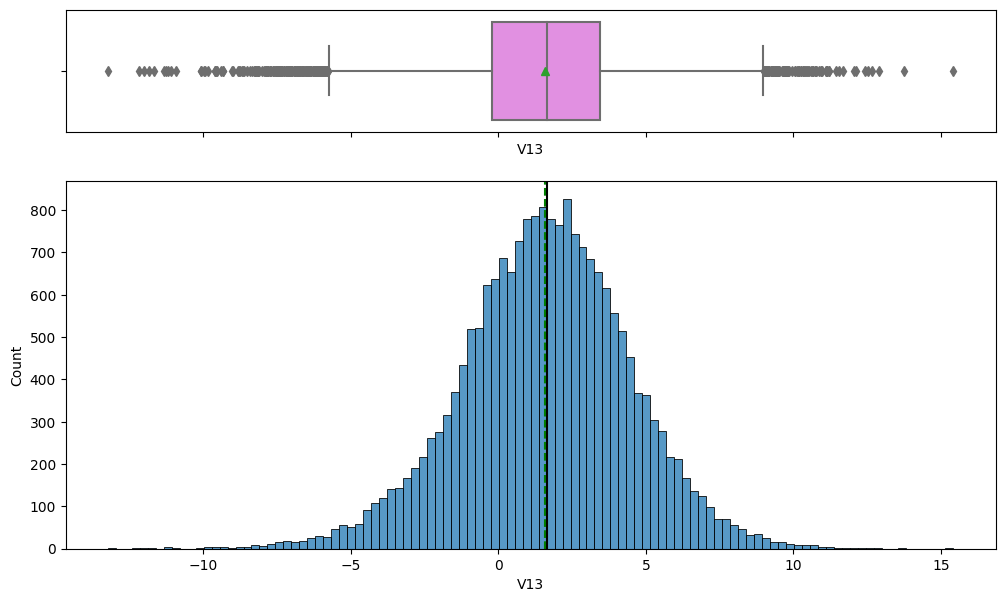

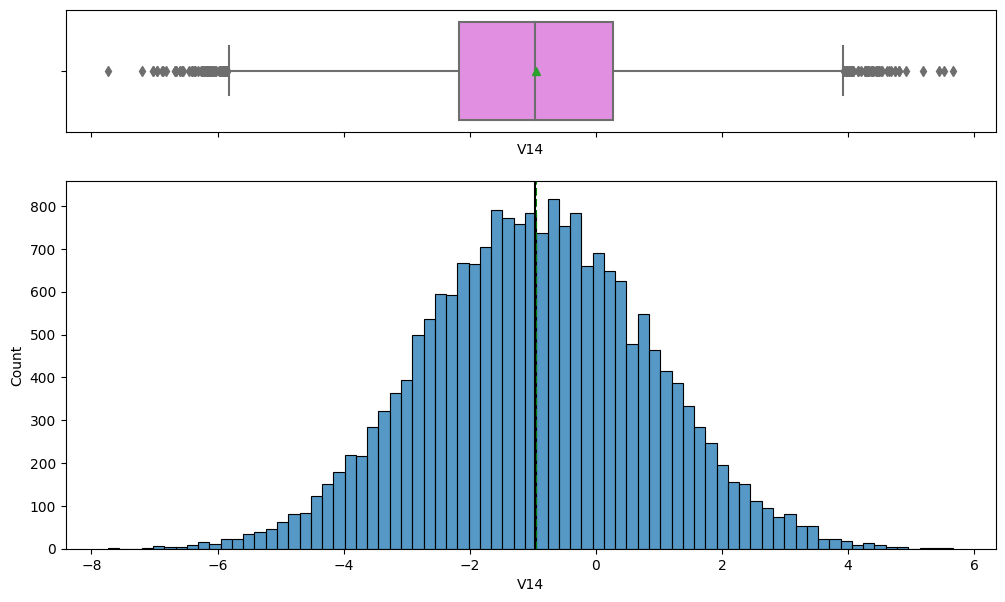

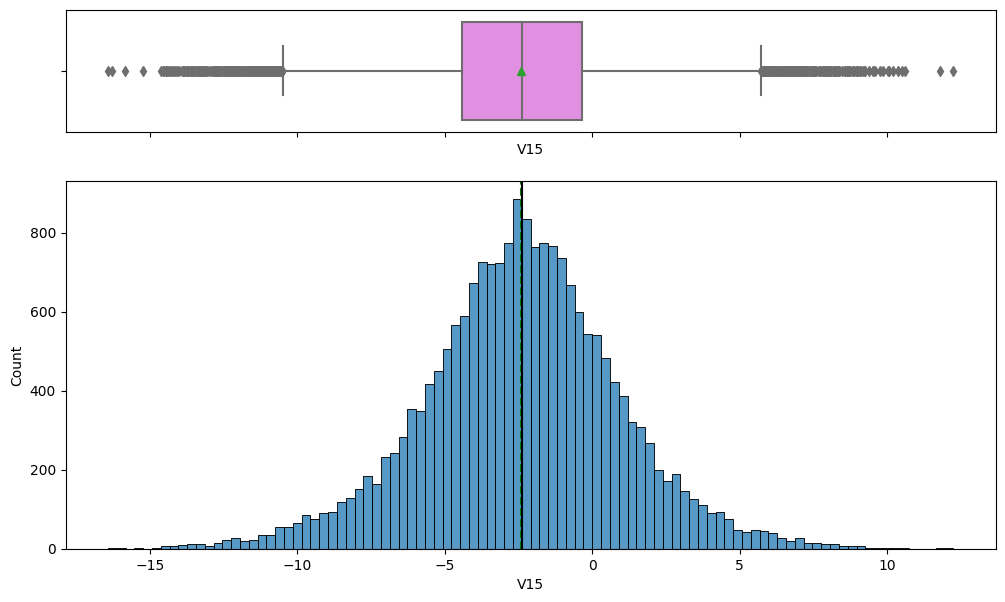

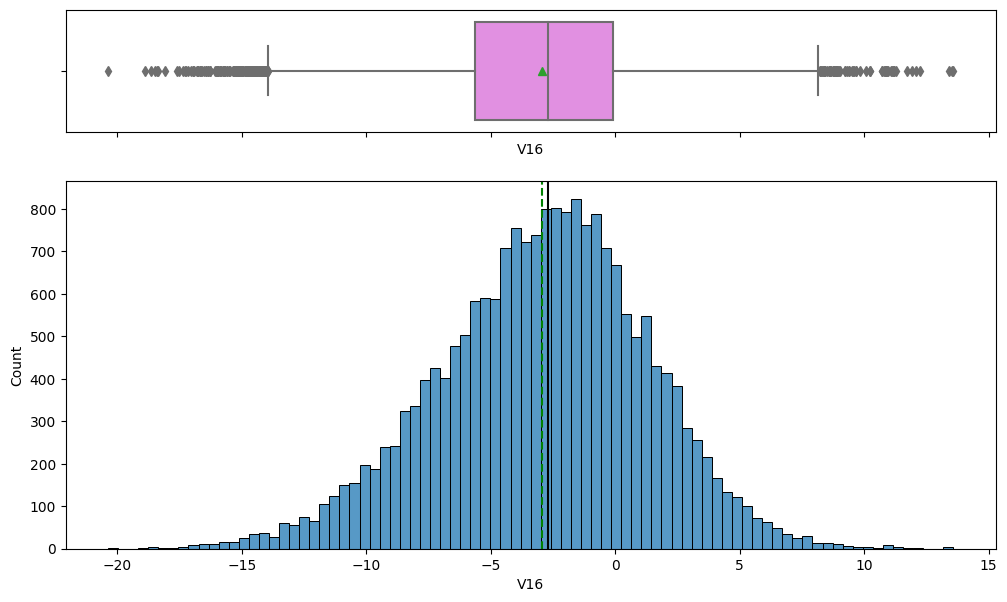

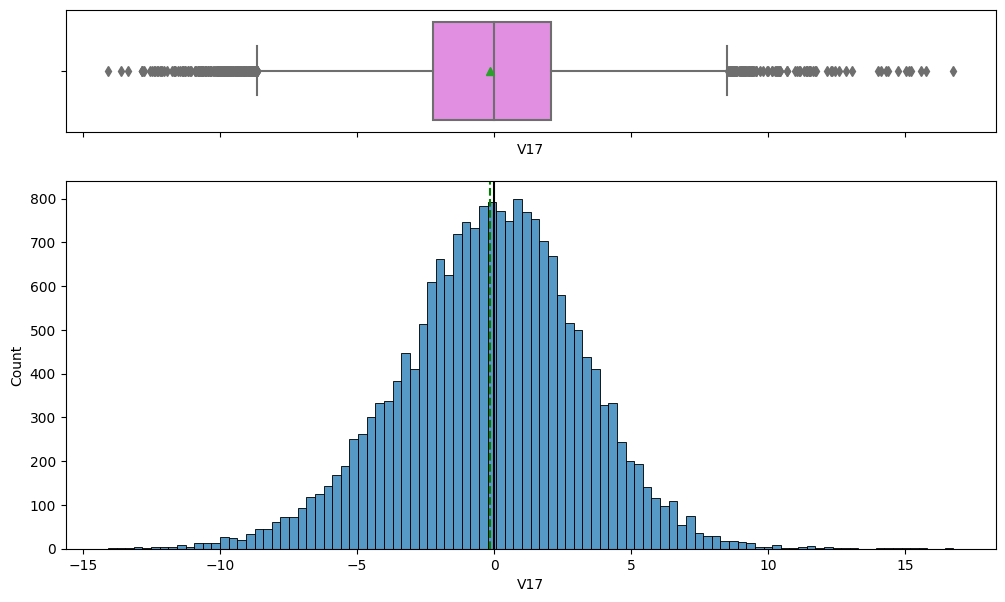

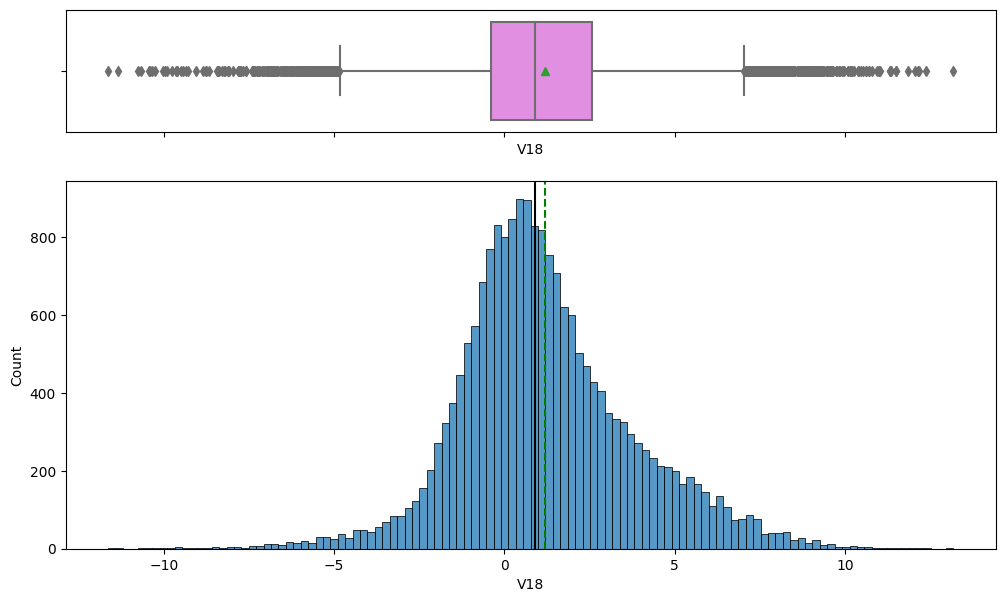

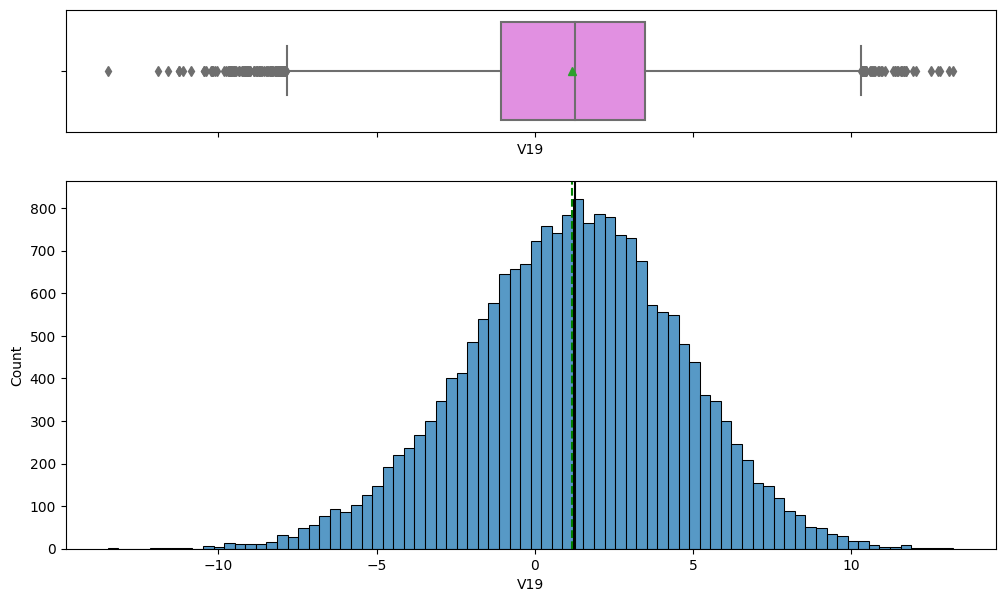

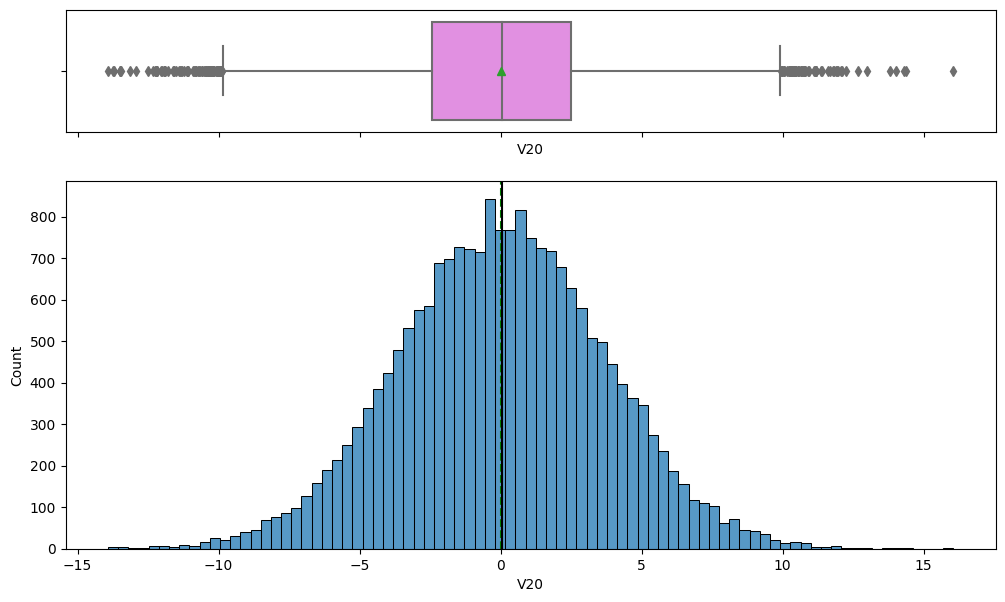

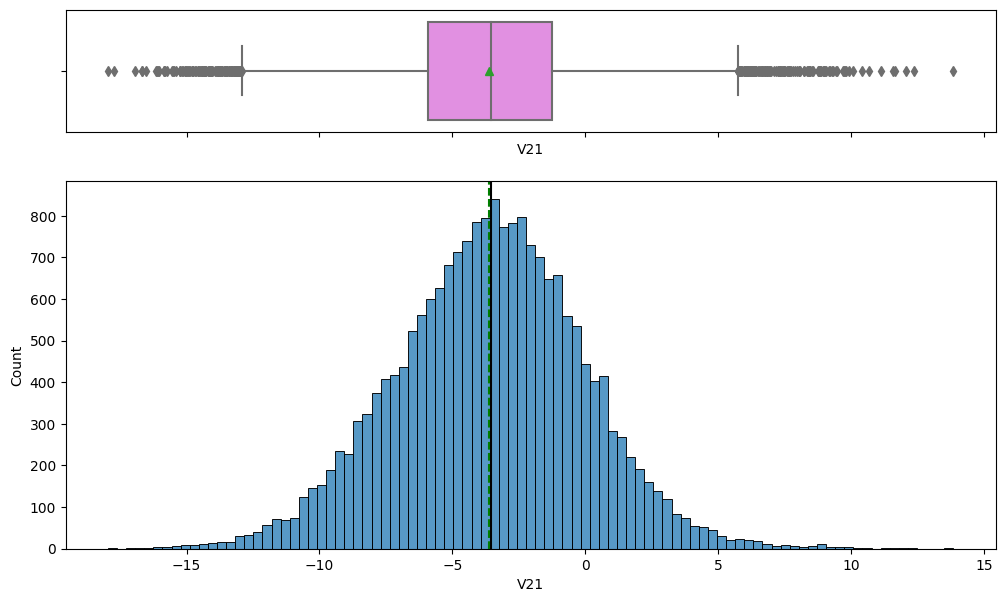

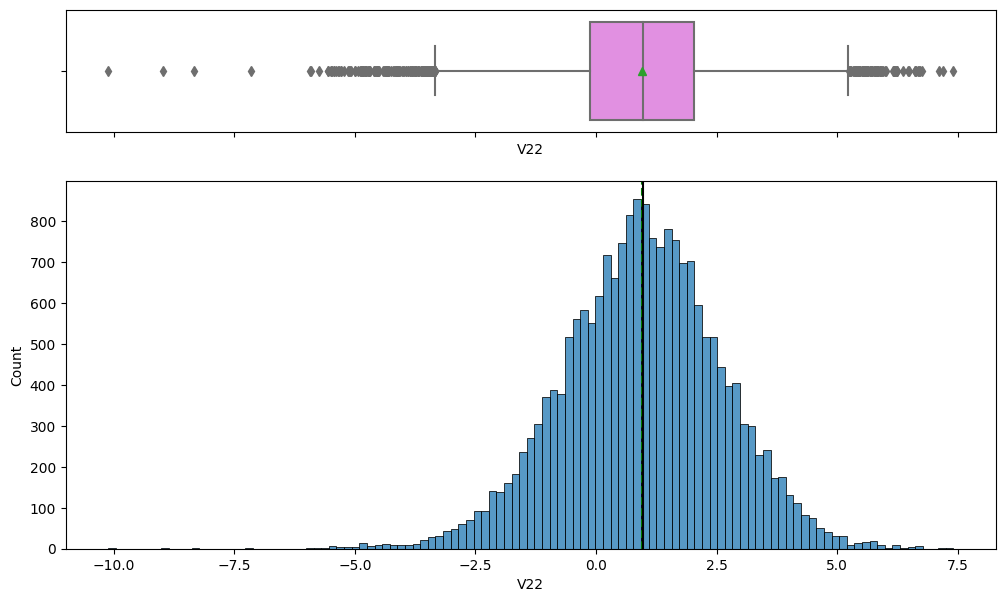

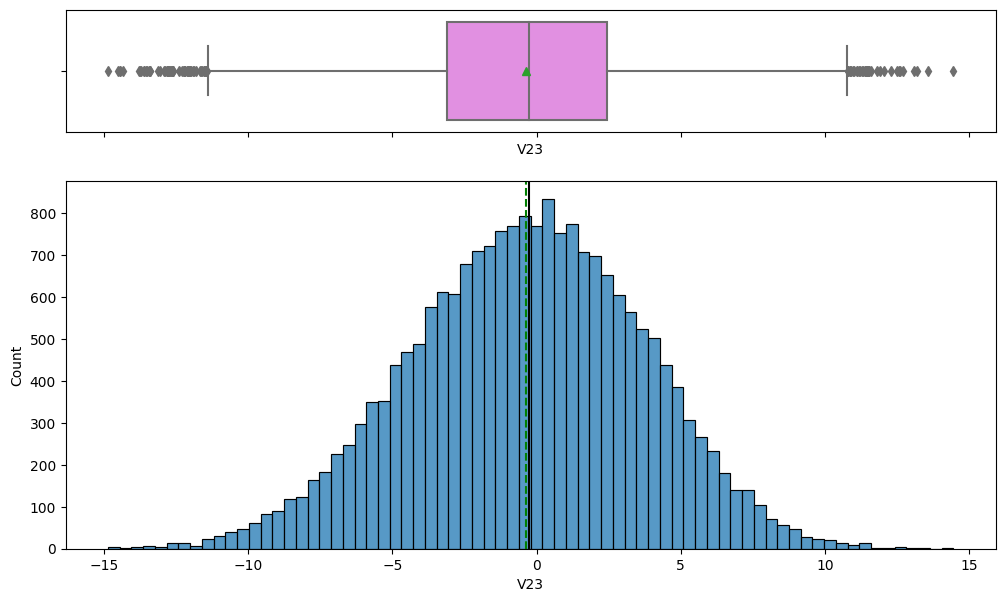

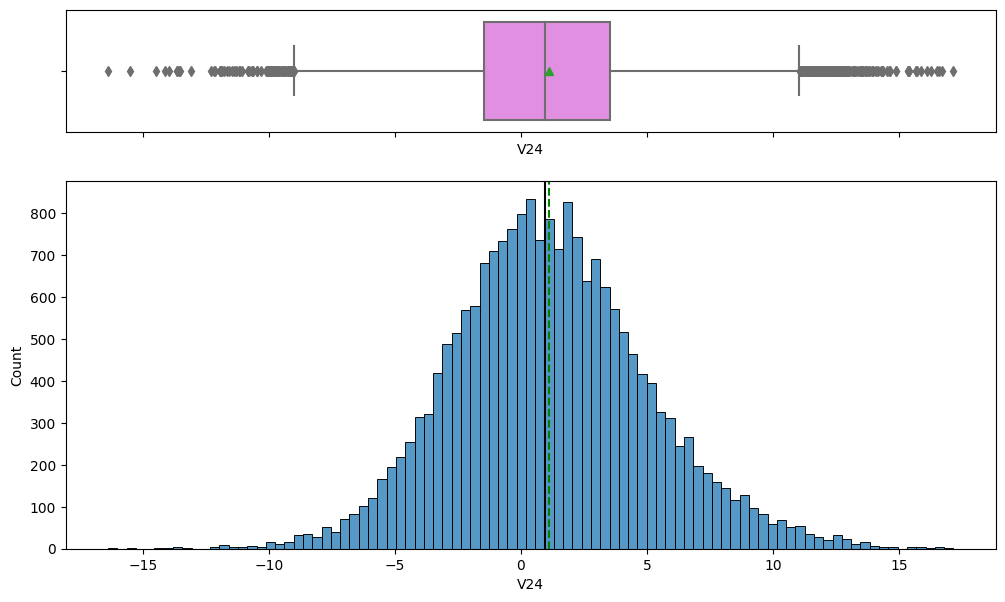

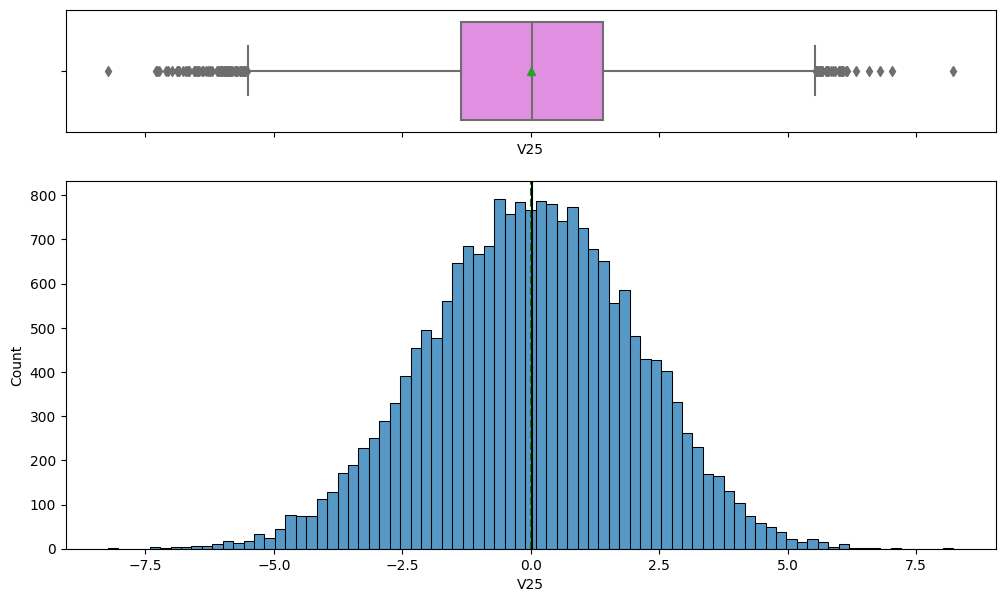

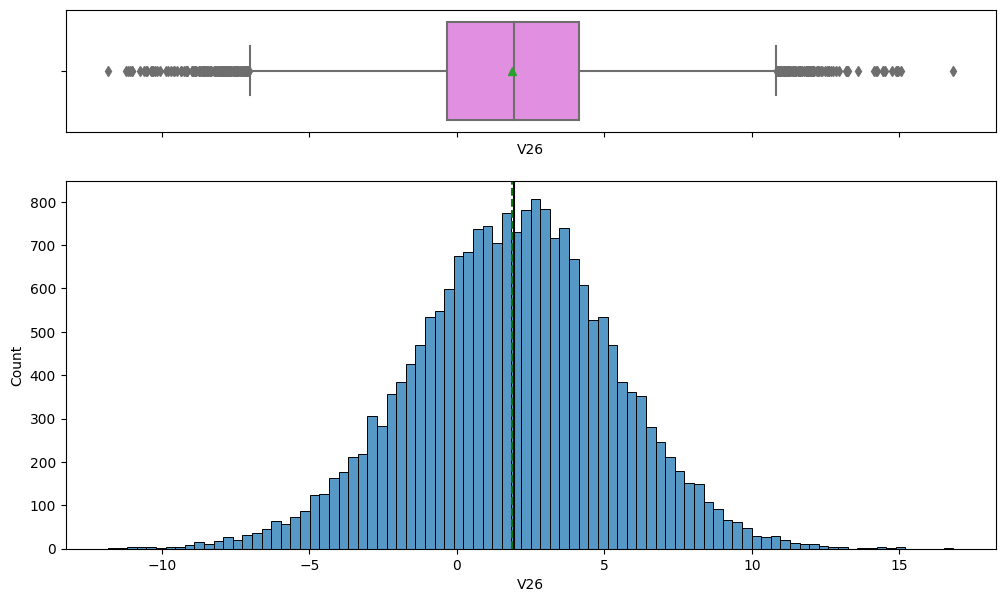

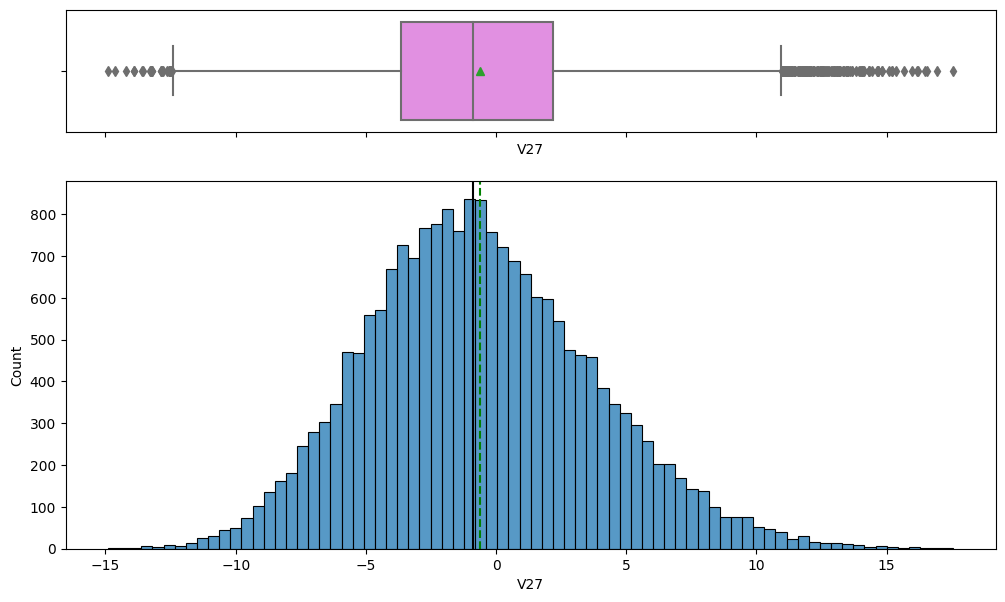

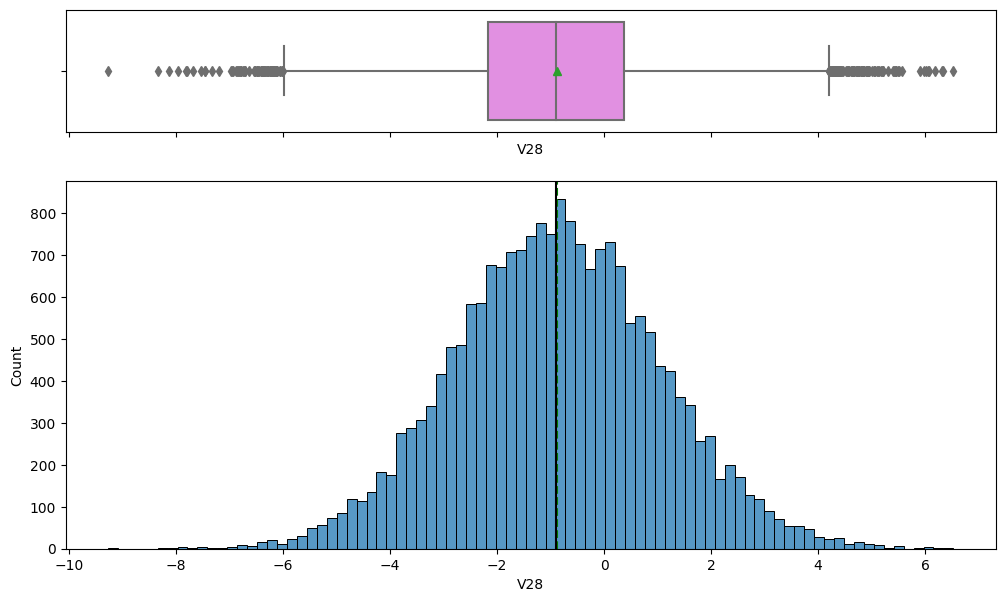

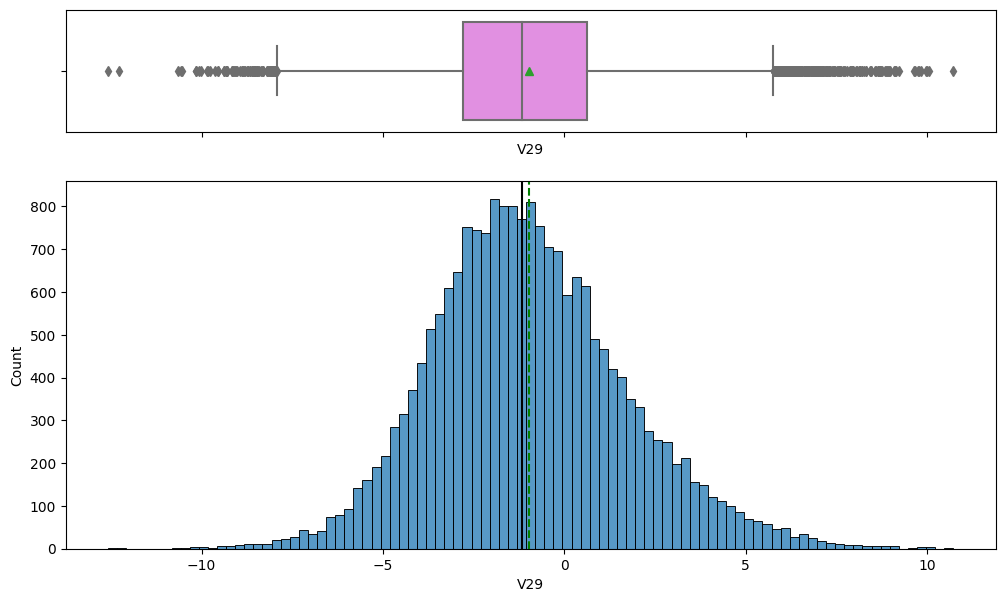

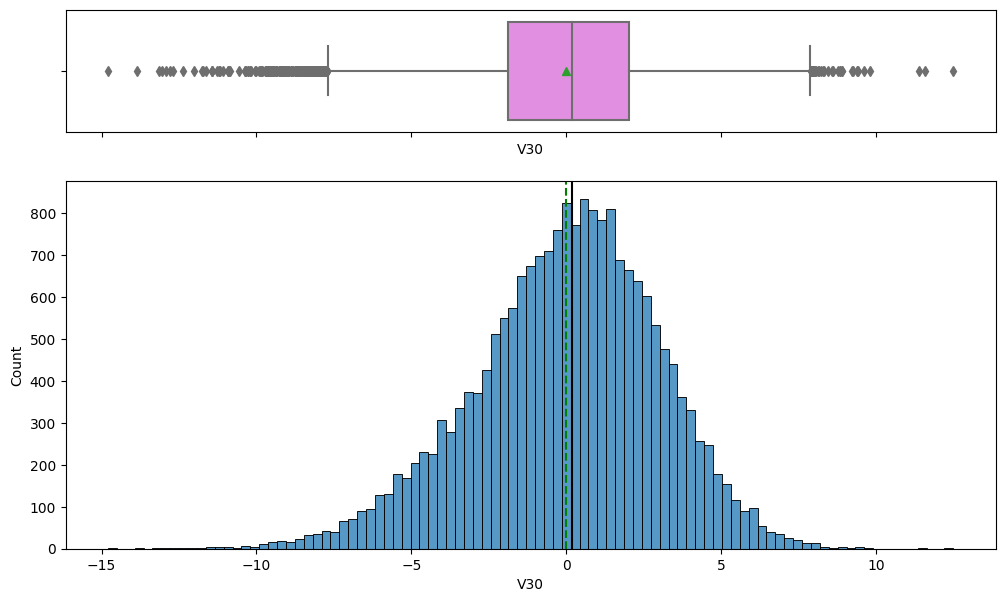

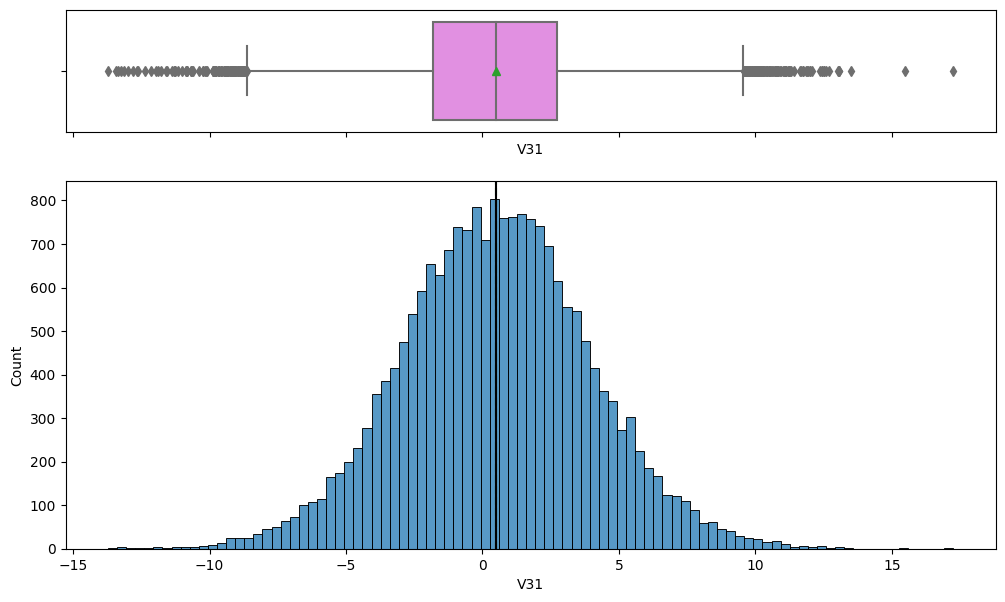

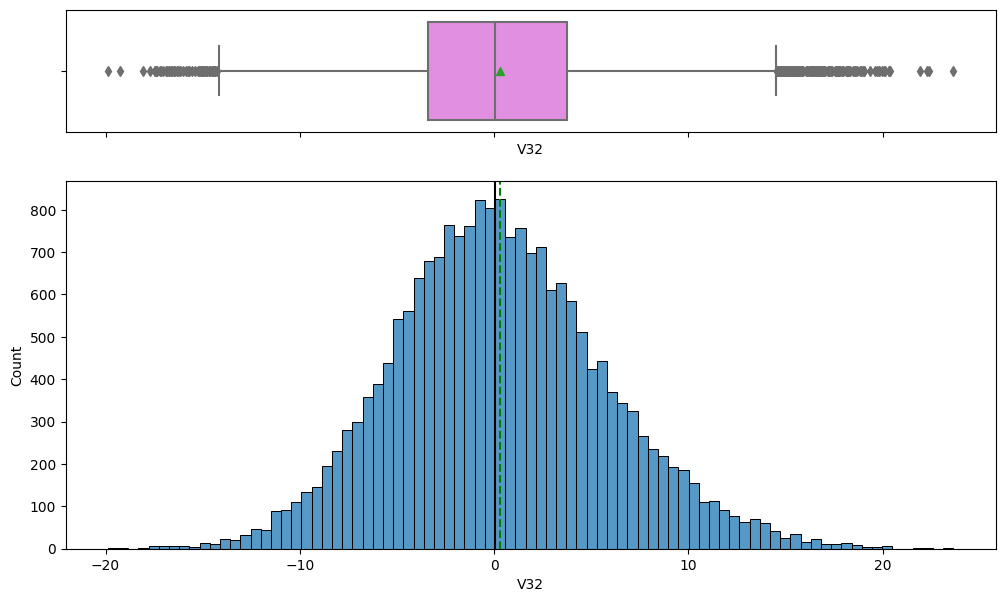

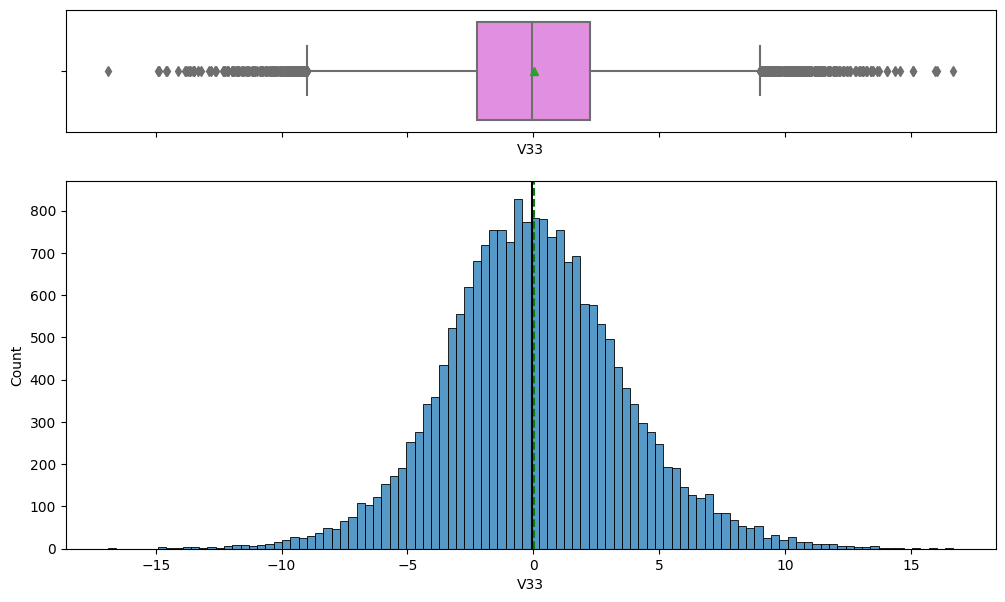

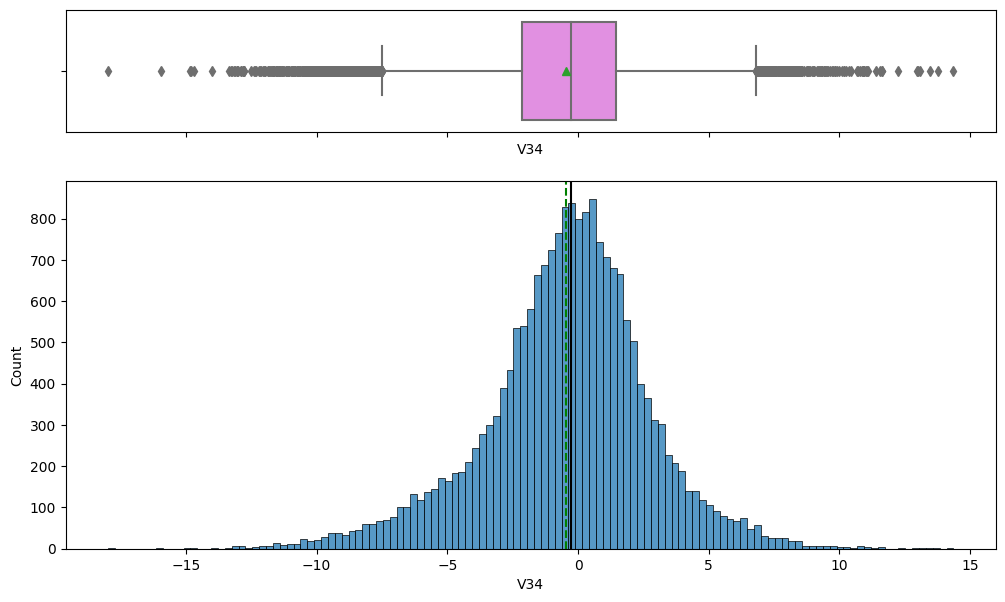

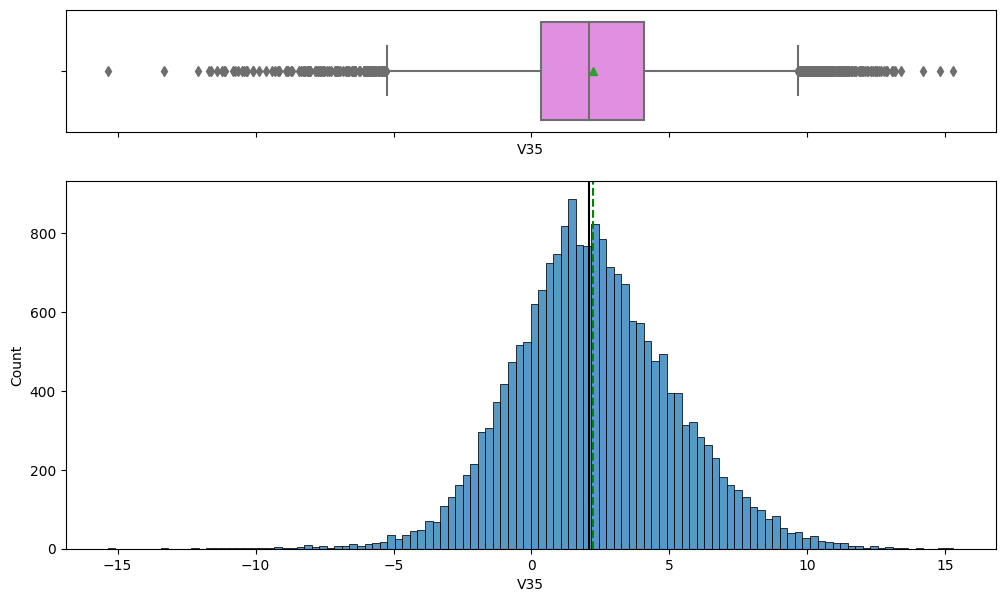

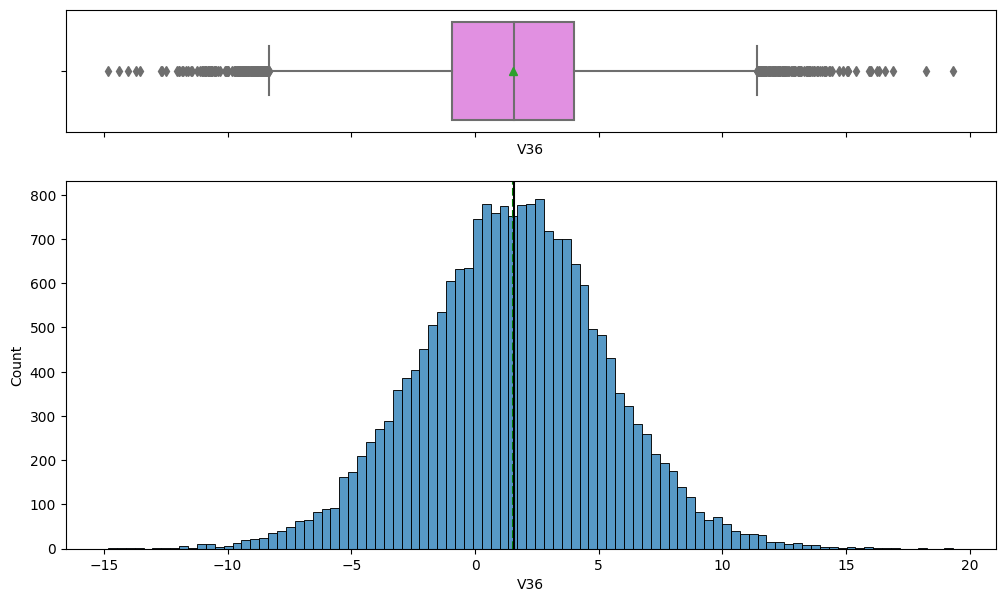

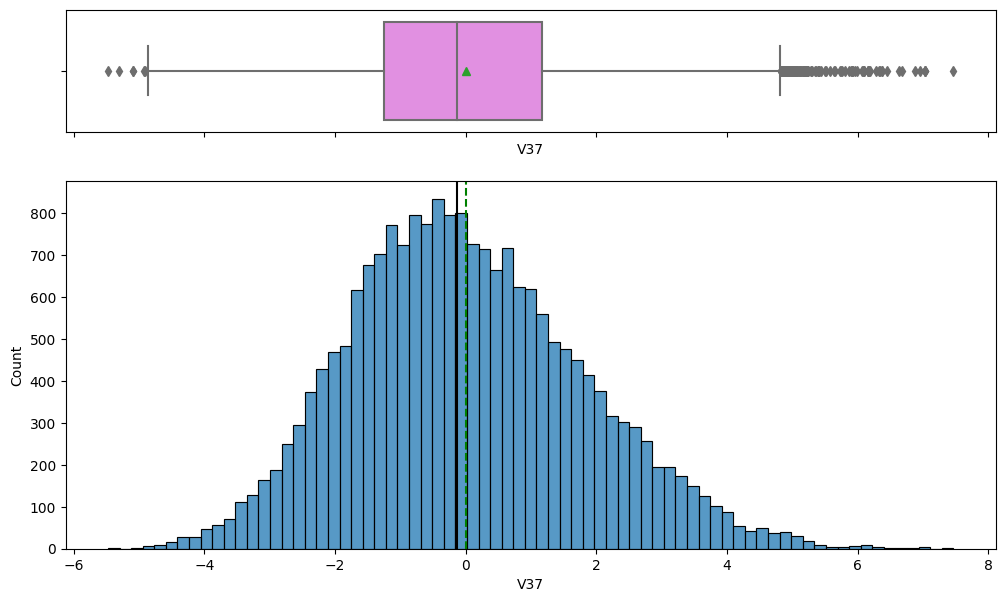

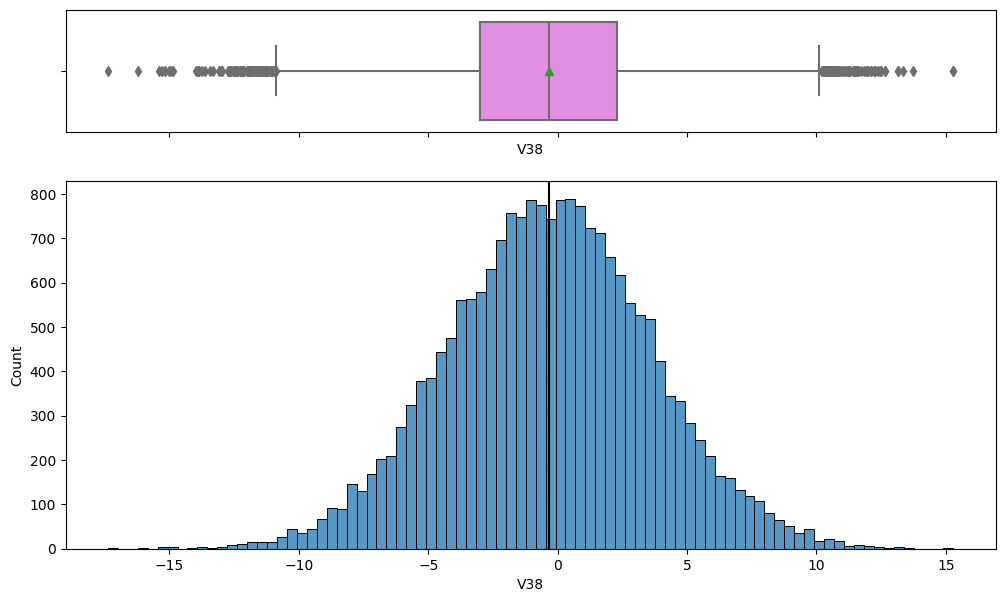

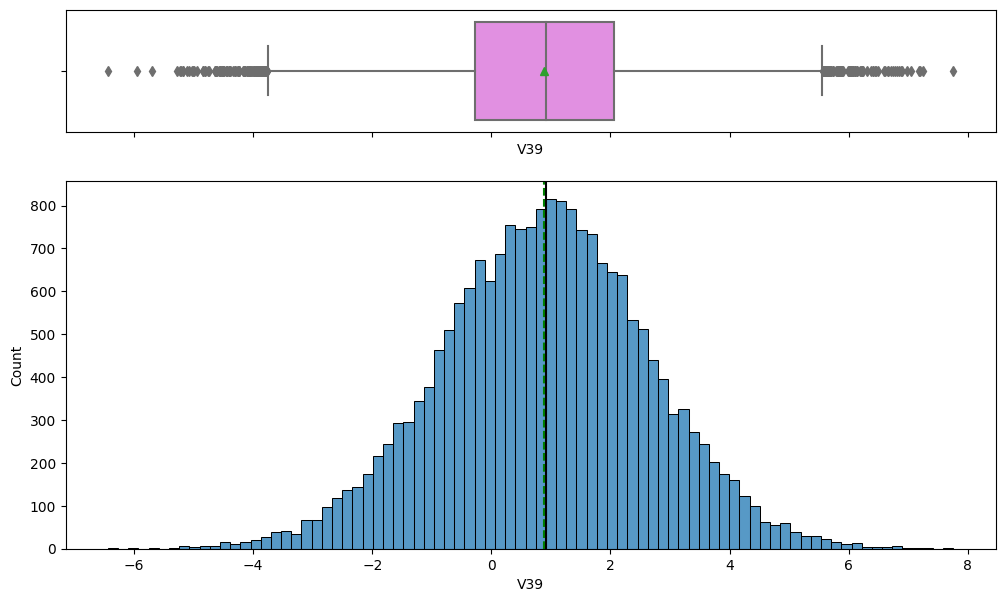

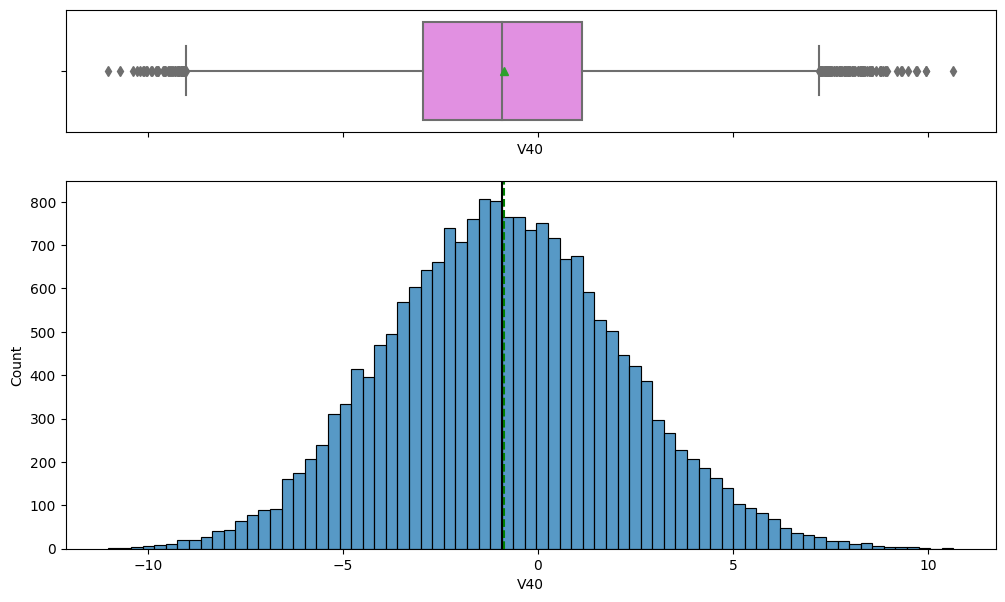

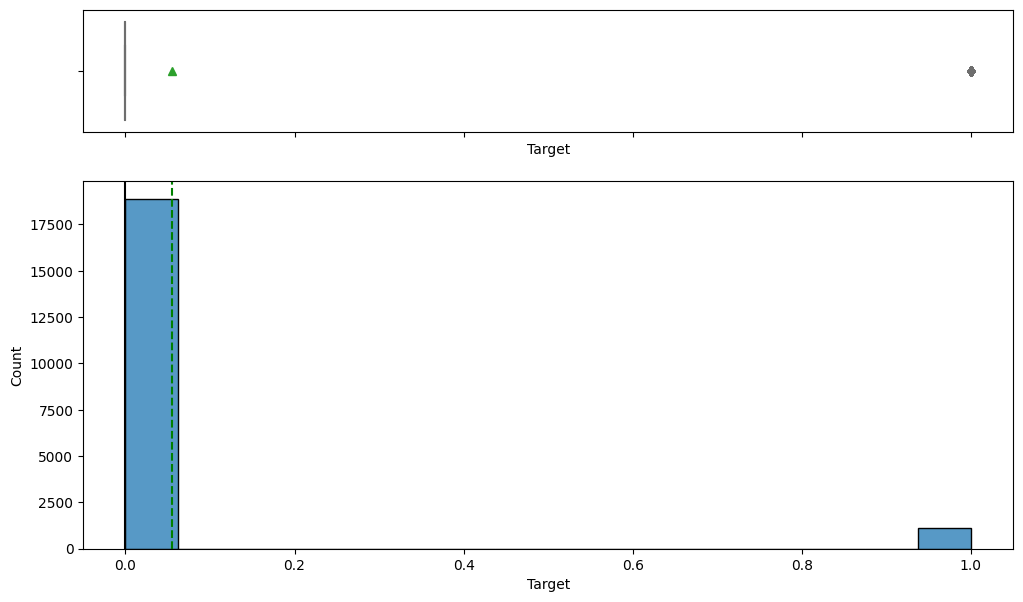

In [ ]:
for feature in df_train.columns:
    histogram_boxplot(df_train, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

**Observations-**
* It can be observed that all 40 V variables are substantially spread at the left and right of their mean; some of them show some slight grade of left
 or right skewness
* We can observe that all 40 V variables show outliers as per upper and lower whiskers; since we lack of background to really know the expected/normal/usual values/ranges for each variable; outliers will not be treated and will be considered as valid/normal values for analysis purposes.

### Bivariate analysis

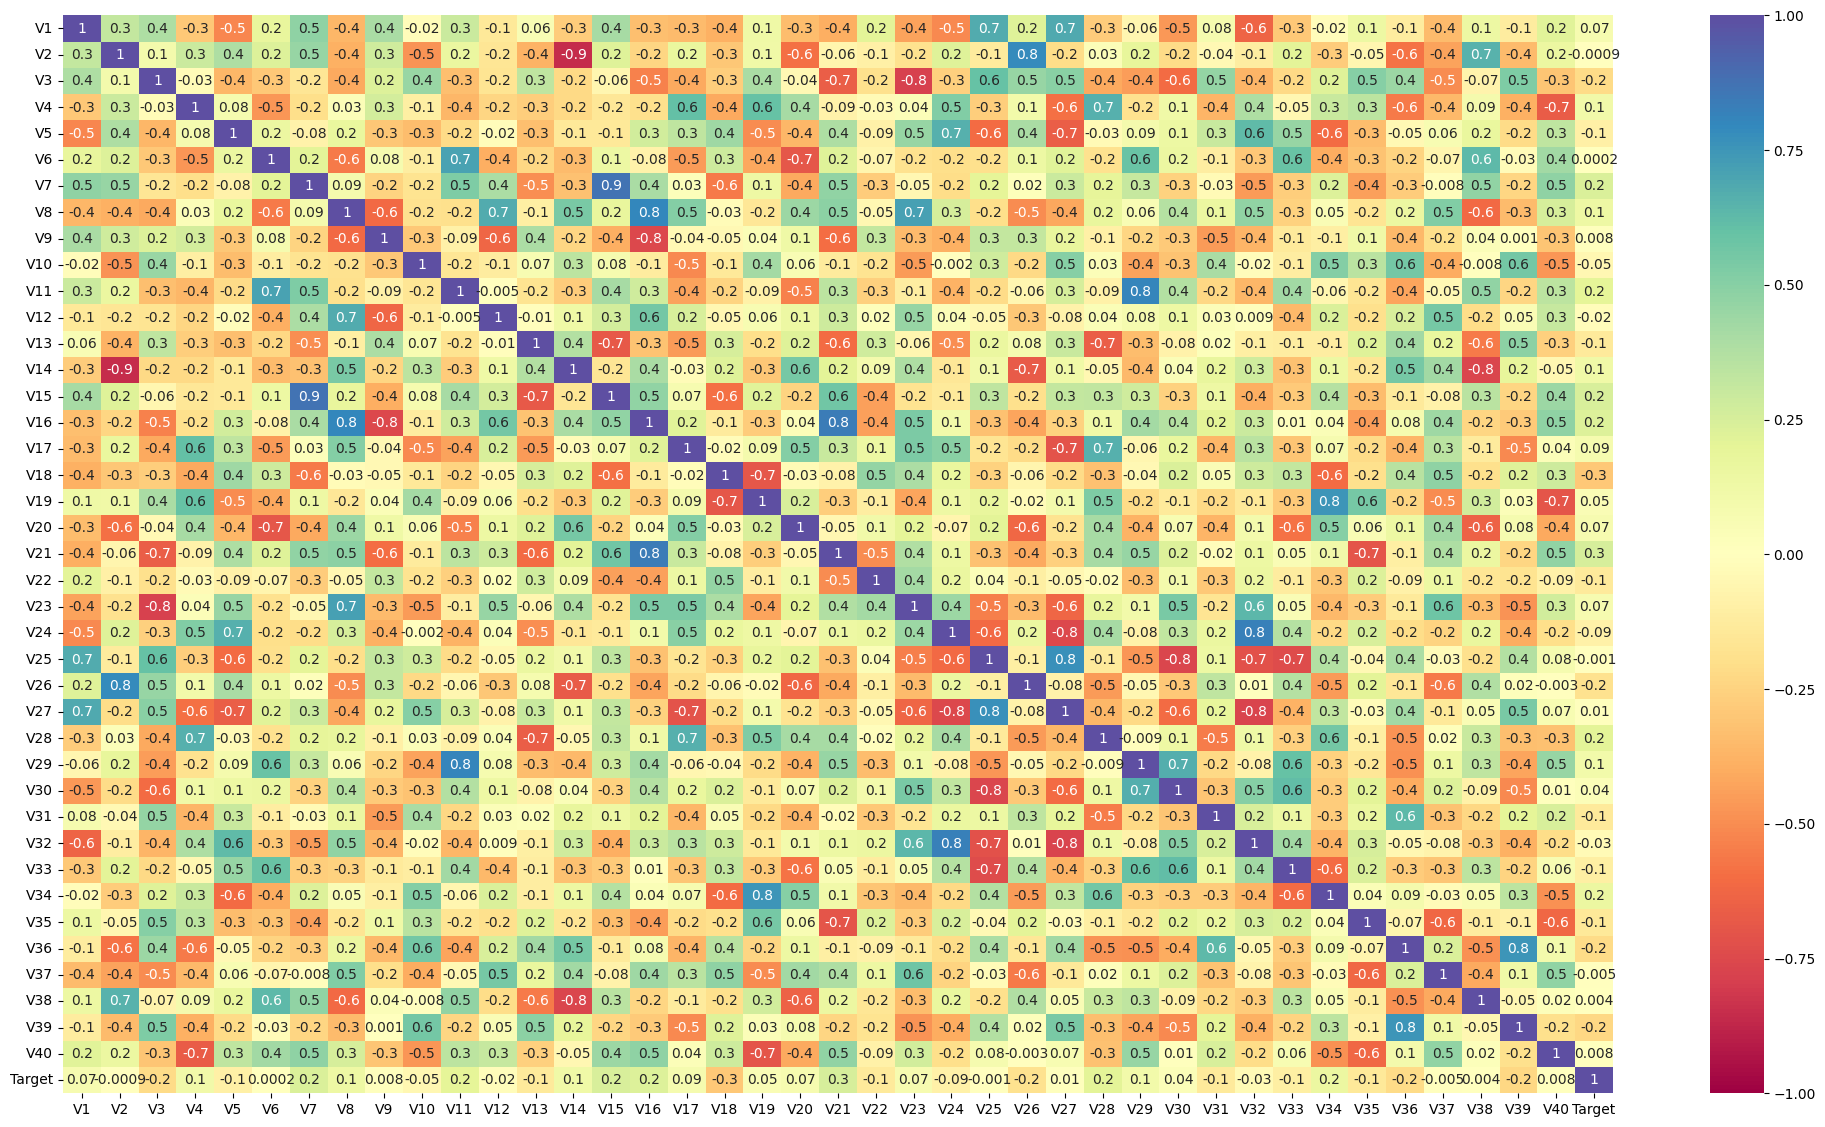

In [ ]:
#checking numerical variables
plt.figure(figsize=(25,14))
sns.heatmap(df_train.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

In [ ]:
df_train.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
V1,1.000,0.314,0.389,-0.295,-0.516,0.176,0.481,-0.361,0.399,-0.022,0.291,-0.145,0.056,-0.274,0.413,-0.335,-0.348,-0.390,0.128,-0.341,-0.392,0.207,-0.437,-0.513,0.676,0.223,0.684,-0.281,-0.062,-0.465,0.085,-0.633,-0.290,-0.019,0.143,-0.125,-0.351,0.148,-0.121,0.213,0.073
V2,0.314,1.000,0.095,0.290,0.384,0.234,0.456,-0.383,0.281,-0.484,0.159,-0.159,-0.382,-0.854,0.222,-0.242,0.165,-0.304,0.119,-0.589,-0.065,-0.096,-0.181,0.222,-0.127,0.787,-0.204,0.033,0.180,-0.216,-0.042,-0.116,0.203,-0.281,-0.055,-0.581,-0.437,0.655,-0.351,0.156,-0.001
V3,0.389,0.095,1.000,-0.029,-0.360,-0.292,-0.156,-0.412,0.234,0.446,-0.335,-0.166,0.330,-0.223,-0.062,-0.533,-0.414,-0.268,0.402,-0.040,-0.658,-0.194,-0.786,-0.265,0.596,0.460,0.500,-0.412,-0.445,-0.607,0.464,-0.367,-0.220,0.226,0.501,0.438,-0.502,-0.074,0.528,-0.306,-0.214
V4,-0.295,0.290,-0.029,1.000,0.084,-0.470,-0.197,0.035,0.265,-0.107,-0.364,-0.235,-0.273,-0.222,-0.151,-0.194,0.607,-0.414,0.596,0.412,-0.086,-0.033,0.037,0.516,-0.270,0.107,-0.588,0.660,-0.186,0.122,-0.368,0.383,-0.052,0.297,0.341,-0.558,-0.357,0.091,-0.389,-0.665,0.111
V5,-0.516,0.384,-0.360,0.084,1.000,0.156,-0.078,0.168,-0.298,-0.344,-0.212,-0.018,-0.333,-0.146,-0.147,0.267,0.328,0.433,-0.504,-0.361,0.384,-0.090,0.457,0.663,-0.603,0.405,-0.663,-0.034,0.093,0.141,0.302,0.620,0.459,-0.607,-0.341,-0.046,0.065,0.172,-0.218,0.335,-0.101
V6,0.176,0.234,-0.292,-0.470,0.156,1.000,0.211,-0.559,0.085,-0.117,0.710,-0.396,-0.229,-0.347,0.145,-0.084,-0.454,0.286,-0.419,-0.695,0.223,-0.068,-0.187,-0.199,-0.190,0.147,0.217,-0.183,0.587,0.153,-0.116,-0.292,0.587,-0.401,-0.317,-0.247,-0.067,0.629,-0.025,0.424,0.000
V7,0.481,0.456,-0.156,-0.197,-0.078,0.211,1.000,0.093,-0.244,-0.177,0.531,0.397,-0.494,-0.323,0.868,0.401,0.028,-0.562,0.136,-0.413,0.471,-0.278,-0.050,-0.211,0.202,0.023,0.289,0.189,0.311,-0.250,-0.034,-0.459,-0.267,0.232,-0.439,-0.280,-0.008,0.469,-0.237,0.479,0.237
V8,-0.361,-0.383,-0.412,0.035,0.168,-0.559,0.093,1.000,-0.612,-0.180,-0.194,0.674,-0.104,0.545,0.176,0.803,0.515,-0.026,-0.152,0.441,0.484,-0.050,0.718,0.250,-0.203,-0.503,-0.419,0.172,0.058,0.361,0.150,0.472,-0.251,0.055,-0.167,0.156,0.523,-0.615,-0.344,0.257,0.136
V9,0.399,0.281,0.234,0.265,-0.298,0.085,-0.244,-0.612,1.000,-0.293,-0.090,-0.630,0.391,-0.238,-0.394,-0.753,-0.041,-0.046,0.041,0.127,-0.597,0.318,-0.344,-0.390,0.315,0.316,0.174,-0.100,-0.236,-0.283,-0.458,-0.369,-0.138,-0.102,0.117,-0.352,-0.200,0.038,0.001,-0.309,0.008
V10,-0.022,-0.484,0.446,-0.107,-0.344,-0.117,-0.177,-0.180,-0.293,1.000,-0.156,-0.120,0.068,0.344,0.080,-0.118,-0.510,-0.144,0.414,0.057,-0.126,-0.175,-0.458,-0.002,0.276,-0.223,0.502,0.034,-0.435,-0.314,0.404,-0.019,-0.110,0.514,0.346,0.561,-0.403,-0.008,0.560,-0.475,-0.051


**Observations-**
* A high degree of possitive correlation can be observed for some variables:V8vV15, V9vV16, V16vV21, V3vV26, V11vV29, V19vV34, V24vV32

* A high degree of negative correlation can be observed for some variables: V3vV14, V9vV16, V3vV23, V14v38


## Data Pre-processing
- Duplicate value check
- Splitting training dataset into training and validation
- Missing value treatment (if needed)
- Outlier check and treatment (if needed)
- Feature engineering
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# creating X and y variables
X = df_train.drop(["Target"], axis=1)
y = df_train["Target"]

X_test = df_test.drop(["Target"], axis=1)
y_test = df_test["Target"]

In [ ]:
# Splitting train dataset into training and validation sets:
# no need of splitting test set since it was already provided

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)


print(X_train.shape, X_val.shape, X_test.shape)

(14000, 40) (6000, 40) (5000, 40)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 14000
Number of rows in validation data = 6000
Number of rows in test data = 5000


####Duplicate value check

In [ ]:
#Checking if duplicates are found in the dataset
dup_count=df_train[df_train.duplicated()]["Target"].count()
print("There are ",dup_count," duplicate observations")

There are  0  duplicate observations


####Feature engineering
* No need of feature engineering

####Outlier detection and treatment
* No value treatment will be performed since there is no enough background about each variable meaning nor the valid/expected values/ranges for each variable

####Preparing data for modeling

In [ ]:
y.value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

In [ ]:
y_train.value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

In [ ]:
y_val.value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

In [ ]:
y_test.value_counts(1)

0   0.944
1   0.056
Name: Target, dtype: float64

**Observations-**
* It can be observed that data is imbalanced, where nearly 95% of the data belong to “No failure” which would be the majority class, while only close to 5% represents "failure" which would be the minotity class that we are insterested in identifying. Models will be checked with the data as it is for now(imbalanced), nonetheless, undersampling or oversampling techniques might be applied if needed.

####Any other preprocessing steps

**No further steps needed for data preparation!**

## Missing value imputation




####Missing value treatment
* We will use mean to impute missing values in V1 and V2 columns. We knew from previous verifications that there are missing values for V1 and V2 variables only.

In [ ]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="mean")
cols_to_impute = ["V1", "V2"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [ ]:
#checking X_train dups
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 19871 to 727
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      14000 non-null  float64
 1   V2      14000 non-null  float64
 2   V3      14000 non-null  float64
 3   V4      14000 non-null  float64
 4   V5      14000 non-null  float64
 5   V6      14000 non-null  float64
 6   V7      14000 non-null  float64
 7   V8      14000 non-null  float64
 8   V9      14000 non-null  float64
 9   V10     14000 non-null  float64
 10  V11     14000 non-null  float64
 11  V12     14000 non-null  float64
 12  V13     14000 non-null  float64
 13  V14     14000 non-null  float64
 14  V15     14000 non-null  float64
 15  V16     14000 non-null  float64
 16  V17     14000 non-null  float64
 17  V18     14000 non-null  float64
 18  V19     14000 non-null  float64
 19  V20     14000 non-null  float64
 20  V21     14000 non-null  float64
 21  V22     14000 non-null  float64
 

In [ ]:
#checking X_val dups
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 910 to 14010
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      6000 non-null   float64
 1   V2      6000 non-null   float64
 2   V3      6000 non-null   float64
 3   V4      6000 non-null   float64
 4   V5      6000 non-null   float64
 5   V6      6000 non-null   float64
 6   V7      6000 non-null   float64
 7   V8      6000 non-null   float64
 8   V9      6000 non-null   float64
 9   V10     6000 non-null   float64
 10  V11     6000 non-null   float64
 11  V12     6000 non-null   float64
 12  V13     6000 non-null   float64
 13  V14     6000 non-null   float64
 14  V15     6000 non-null   float64
 15  V16     6000 non-null   float64
 16  V17     6000 non-null   float64
 17  V18     6000 non-null   float64
 18  V19     6000 non-null   float64
 19  V20     6000 non-null   float64
 20  V21     6000 non-null   float64
 21  V22     6000 non-null   float64
 2

In [ ]:
#checking X_test dups
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      5000 non-null   float64
 1   V2      5000 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

No missing values are observed now!

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

#### All models in at one go

In [ ]:
#Getting results comparison for all models at one go
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("lRegression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
score_t = []
all_metrics_performance=pd.DataFrame()
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores*100))

print("\n" "Test Performance:" "\n")
for name, model in models:
    #model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test))
    score_t.append(scores)
    print("{}: {}".format(name, scores*100))


Cross-Validation Performance:

dtree: 70.78246484698097
lRegression: 49.024813895781634
Bagging: 70.7808105872622
Random forest: 71.81224152191893
GBM: 72.20016542597187
Adaboost: 64.34656741108354
Xgboost: 79.92307692307692

Validation Performance:

dtree: 70.57057057057057
lRegression: 50.150150150150154
Bagging: 72.67267267267268
Random forest: 73.57357357357357
GBM: 73.57357357357357
Adaboost: 65.16516516516516
Xgboost: 81.98198198198197

Test Performance:

dtree: 69.50354609929079
lRegression: 46.45390070921986
Bagging: 65.95744680851064
Random forest: 71.63120567375887
GBM: 68.08510638297872
Adaboost: 62.4113475177305
Xgboost: 79.43262411347519


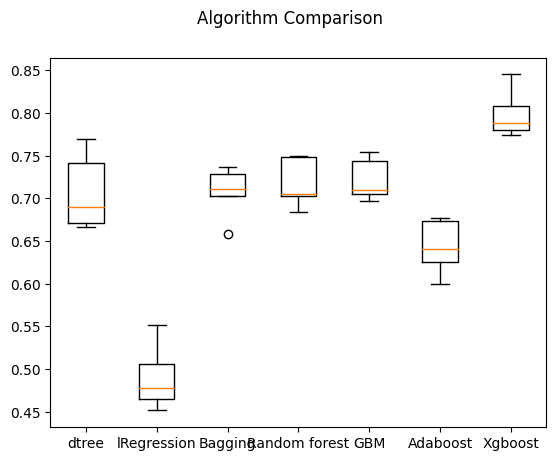

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations-**
- We can see that Xgboost is giving the highest cross-validated recall, followed by GBM and Random Forests
- The boxplot shows that the performance of Xgboost, GBM and Random Forest shows a good performance in the crossvalidation-training, and their performance on the validation and test set is also good and consistent with the crossvalidation-training performance

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 777
Before UpSampling, counts of label 'No': 13223 

After UpSampling, counts of label 'Yes': 13223
After UpSampling, counts of label 'No': 13223 

After UpSampling, the shape of train_X: (26446, 40)
After UpSampling, the shape of train_y: (26446,) 



**Observations-**
- As expected we can observe the oversampled data with a bigger dataset than before. We might expect some increase in the execution time

#### All oversampled models in at one go

In [ ]:
#Getting results comparison for all models at one go

results_over = []  # Empty list to store all model's CV scores
names_over = []  # Empty list to store name of the models
score_over = []  #for validations results
score_over_t = [] #for test results
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance OVERSAMPLED:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result)
    names_over.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score_over.append(scores)
    print("{}: {}".format(name, scores*100))

print("\n" "Test Performance:" "\n")
for name, model in models:
    #model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test))
    score_over_t.append(scores)
    print("{}: {}".format(name, scores*100))


Cross-Validation Performance OVERSAMPLED:

dtree: 97.0128321355339
lRegression: 89.17044404851445
Bagging: 97.5119441528989
Random forest: 98.2984651198705
GBM: 93.29201902370527
Adaboost: 90.4787470436327
Xgboost: 98.9715130594934

Validation Performance:

dtree: 78.37837837837837
lRegression: 84.98498498498499
Bagging: 82.58258258258259
Random forest: 85.58558558558559
GBM: 87.68768768768768
Adaboost: 86.18618618618619
Xgboost: 85.88588588588588

Test Performance:

dtree: 78.01418439716312
lRegression: 81.20567375886525
Bagging: 78.72340425531915
Random forest: 82.62411347517731
GBM: 84.39716312056737
Adaboost: 82.97872340425532
Xgboost: 83.68794326241135


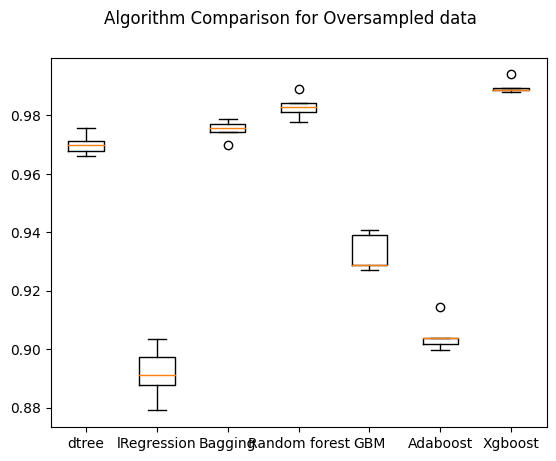

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison for Oversampled data")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

**Observations-**
- We can see now that GBM is giving the highest cross-validated recall, followed by Xgboost and Adaboost
- The boxplot and the above listed metrics shows that all the models are overfitting the training data as per the indicaiton of crossvalidation-training, and their performance on the validation set and test set is good and consistent

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 777
Before Under Sampling, counts of label 'No': 13223 

After Under Sampling, counts of label 'Yes': 777
After Under Sampling, counts of label 'No': 777 

After Under Sampling, the shape of train_X: (1554, 40)
After Under Sampling, the shape of train_y: (1554,) 



In [ ]:
#Getting results comparison for all models at one go

results_un = []  # Empty list to store all model's CV scores
names_un = []  # Empty list to store name of the models
score_un = []  #for validations results
score_un_t = [] #for test results
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance UNDERSAMPLED:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result)
    names_un.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score_un.append(scores)
    print("{}: {}".format(name, scores*100))

print("\n" "Test Performance:" "\n")
for name, model in models:
    #model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test))
    score_un_t.append(scores)
    print("{}: {}".format(name, scores*100))


Cross-Validation Performance UNDERSAMPLED:

dtree: 86.22167080231597
lRegression: 87.26220016542598
Bagging: 88.0339123242349
Random forest: 90.34822167080232
GBM: 89.32009925558313
Adaboost: 87.25971877584782
Xgboost: 89.70554177005789

Validation Performance:

dtree: 84.08408408408408
lRegression: 84.68468468468468
Bagging: 87.08708708708708
Random forest: 88.28828828828829
GBM: 88.28828828828829
Adaboost: 85.88588588588588
Xgboost: 89.1891891891892

Test Performance:

dtree: 81.56028368794325
lRegression: 81.56028368794325
Bagging: 84.39716312056737
Random forest: 86.52482269503547
GBM: 86.17021276595744
Adaboost: 86.17021276595744
Xgboost: 86.87943262411348


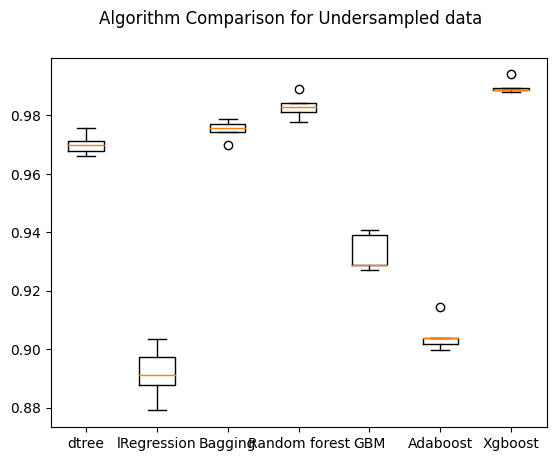

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison for Undersampled data")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names_over)

plt.show()

**Observations-**
- We can see now that Randorm forest is giving the highest cross-validated recall, followed by Xgboost and GBM
- The boxplot shows that the performance of Random forest, Xgboost and GBM show a good performance in the crossvalidation-training, and their performance on the validation and test set is also good and consistent with the crossvalidation-training performance

## HyperparameterTuning

**We will tune random forest undersampled, xgboost undersampled and GBM undersampled models using RandomizedSearchCV; all of them result to have the better performance consistent between cv-training, validation and test; all of them were the ones that generalized better**

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#### Random Forest Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
model = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

#parameter grid to pass to randomsearch
parameters = { "n_estimators": [100,200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1),
               'max_depth': list(np.arange(5,30,5)) + [None]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling randomized search
rf_tuned = RandomizedSearchCV(model, param_distributions=parameters,n_iter=100,cv=5,scoring=scorer,random_state=1,n_jobs = -1)

#fitting parameters in RandomizedSearchCV
rf_tuned.fit(X_train_un, y_train_un)

# perform the hyperparameter tuning with random search
print(
    "Best parameters are {} with CV score={}:".format(
        rf_tuned.best_params_, rf_tuned.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt', 'max_depth': 15} with CV score=0.9034574028122415:


Training performance:
    Accuracy  Recall  Precision    F1
0     0.984   0.969      0.999 0.984


,Accuracy,Recall,Precision,F1
0,0.984,0.969,0.999,0.984




Validation performance:
    Accuracy  Recall  Precision    F1
0     0.935   0.880      0.455 0.600


,Accuracy,Recall,Precision,F1
0,0.935,0.880,0.455,0.600




Testing performance:
    Accuracy  Recall  Precision    F1
0     0.937   0.869      0.470 0.610


,Accuracy,Recall,Precision,F1
0,0.937,0.869,0.470,0.610


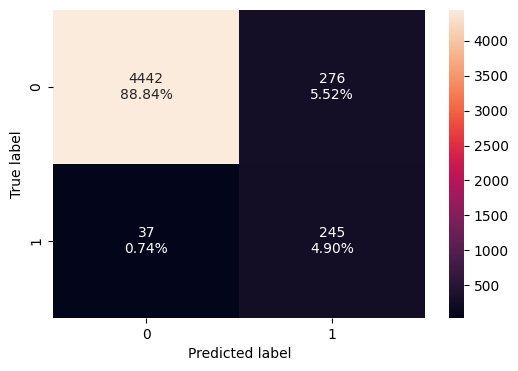

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train_un,y_train_un)
print("Training performance:\n",rf_tuned_model_train_perf)
display(rf_tuned_model_train_perf)
print("\n")

rf_tuned_model_val_perf=model_performance_classification_sklearn(rf_tuned,X_val,y_val)
print("Validation performance:\n",rf_tuned_model_val_perf)
display(rf_tuned_model_val_perf)
print("\n")

rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)
display(rf_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

**Observations-**
- The model seems to have a good accuracy for the training and validation set with a slight overfit in terms of accuracy(5%)
- The model overfits the training data in terms of recall, the performance is very good though 88% for the validation set, nonetheless there is a sligth overfit in terms of recall(9%)
- The model is not performing well in terms of precission and F1 since model is overfitting the training data, nonetheless we are more interested in recall as per the definition of the problem

#### XGBoost Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
model = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters={ 'n_estimators': [50, 150, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling randomized search
xgb_tuned = RandomizedSearchCV(model, param_distributions=parameters,n_iter=40,cv=5,scoring=scorer,random_state=1,n_jobs = -1)

#fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un, y_train_un)

# perform the hyperparameter tuning with random search
print(
    "Best parameters are {} with CV score={}:".format(
        xgb_tuned.best_params_, xgb_tuned.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9291976840363937:


Training performance:
    Accuracy  Recall  Precision    F1
0     0.991   1.000      0.982 0.991


,Accuracy,Recall,Precision,F1
0,0.991,1.000,0.982,0.991




Validation performance:
    Accuracy  Recall  Precision    F1
0     0.863   0.904      0.276 0.423


,Accuracy,Recall,Precision,F1
0,0.863,0.904,0.276,0.423




Testing performance:
    Accuracy  Recall  Precision    F1
0     0.857   0.894      0.268 0.413


,Accuracy,Recall,Precision,F1
0,0.857,0.894,0.268,0.413


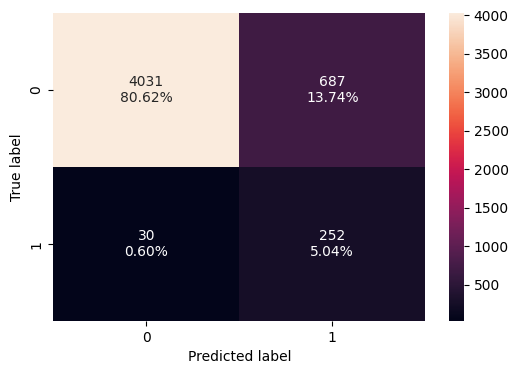

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train_un,y_train_un)
print("Training performance:\n",xgb_tuned_model_train_perf)
display(xgb_tuned_model_train_perf)
print("\n")

xgb_tuned_model_val_perf=model_performance_classification_sklearn(xgb_tuned,X_val,y_val)
print("Validation performance:\n",xgb_tuned_model_val_perf)
display(xgb_tuned_model_val_perf)
print("\n")

xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)
display(xgb_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

**Observations-**
- The model seems to have a good accuracy but is overfitting the training data(13% difference between training and validation)
- The model overfits the training data in terms of recall, the performance is very good though 90% for the validation set, nonetheless there is a substantial overfit in terms of recall(10%)
- The model is overfitting precission and F1 since more than random forest.

#### Gradient Boosting Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling randomized search
gbc_tuned = RandomizedSearchCV(model, param_distributions=parameters,n_iter=40,cv=5,scoring=scorer,random_state=1,n_jobs = -1)

#fitting parameters in RandomizedSearchCV
gbc_tuned.fit(X_train_un, y_train_un)

# perform the hyperparameter tuning with random search
print(
    "Best parameters are {} with CV score={}:".format(
        gbc_tuned.best_params_, gbc_tuned.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9073366418527709:


Training performance:
    Accuracy  Recall  Precision    F1
0     0.998   0.996      1.000 0.998


,Accuracy,Recall,Precision,F1
0,0.998,0.996,1.000,0.998




Validation performance:
    Accuracy  Recall  Precision    F1
0     0.926   0.889      0.420 0.570


,Accuracy,Recall,Precision,F1
0,0.926,0.889,0.420,0.570




Testing performance:
    Accuracy  Recall  Precision    F1
0     0.927   0.872      0.426 0.573


,Accuracy,Recall,Precision,F1
0,0.927,0.872,0.426,0.573


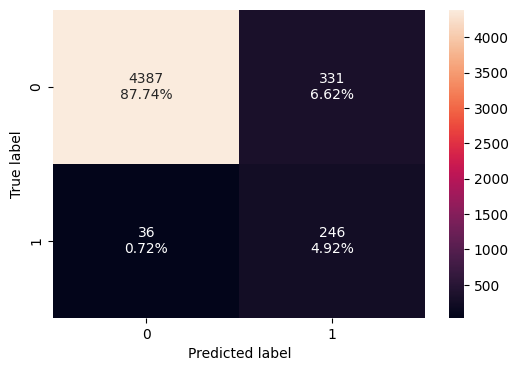

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train_un,y_train_un)
print("Training performance:\n",gbc_tuned_model_train_perf)
display(gbc_tuned_model_train_perf)
print("\n")

gbc_tuned_model_val_perf=model_performance_classification_sklearn(gbc_tuned,X_val,y_val)
print("Validation performance:\n",gbc_tuned_model_val_perf)
display(gbc_tuned_model_val_perf)
print("\n")

gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)
display(gbc_tuned_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

**Observations-**
- The model seems to have a good accuracy but is overfitting the training data(7% difference between training and validation)
- The model overfits the training data in terms of recall, the performance is very good though 89% for the validation set, nonetheless there is a substantial overfit in terms of recall(11%)
- The model is overfitting precission and F1 since more than random forest and Xgboost.

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        gbc_tuned_model_train_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random forest undersampled",
    "Xgboost undersampled",
    "GBM undersampled",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Random forest undersampled,Xgboost undersampled,GBM undersampled
Accuracy,0.984,0.991,0.998
Recall,0.969,1.000,0.996
Precision,0.999,0.982,1.000
F1,0.984,0.991,0.998


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        rf_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T,
        gbc_tuned_model_val_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random forest undersampled",
    "Xgboost undersampled",
    "GBM undersampled",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Random forest undersampled,Xgboost undersampled,GBM undersampled
Accuracy,0.935,0.863,0.926
Recall,0.880,0.904,0.889
Precision,0.455,0.276,0.420
F1,0.600,0.423,0.570


**Observations-**
- Random forest will be choosen as the final model. It shows a slightly lower performance in terms of recall for the validation set 88% compared to the 90% of Xgboost and 89% of GBM, nonetheless the overfit is lower in terms of Accuracy and recall. Overfitting for Random forest is also lower for precision and F1. Having a low precision means that the model is not good at identifying "No failure", this might result in an increase of cost inspection, so Random forest will have a smaller risk of cost inspection by having a higher precision than Xgboost and GBM.



### Test set final performance

In [ ]:
# performance comparison on the testing set
models_train_comp_df = pd.concat(
    [
        rf_tuned_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        gbc_tuned_model_test_perf.T
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Random forest undersampled",
    "Xgboost undersampled",
    "GBM undersampled",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Random forest undersampled,Xgboost undersampled,GBM undersampled
Accuracy,0.937,0.857,0.927
Recall,0.869,0.894,0.872
Precision,0.470,0.268,0.426
F1,0.610,0.413,0.573


- We can see that the model shows a similar performance to the validation set when using the testing set

## Pipelines to build the final model


#### Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



#### Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

We will create a single pipelines for numerical columns, since all of them are numerical:
- We will do missing value imputation as pre-processing

In [ ]:
# creating a list of numerical variables
numerical_features = ["V1","V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30", "V31", "V32", "V33", "V34", "V35", "V36", "V37", "V38", "V39", "V40"]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


**Note**: We will be doing missing value imputation for the whole data so that if there are any missing values in the data in future, they can be taken care of

In [ ]:
# Separating target variable and other variables

# Separating target variable and other variables
X = df_train.drop("Target", axis=1)
Y = df_train["Target"]

In [ ]:
#@title
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(14000, 40) (6000, 40)


In [ ]:
# Creating new pipeline with best parameters

model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "RandomForest",
            RandomForestClassifier(
           random_state=1,
           oob_score=True,
           bootstrap=True,
           n_estimators=300,
           min_samples_leaf=1,
           max_samples=0.6,
           max_features='sqrt',
           max_depth=15,
        ),
        ),
    ]
)

In [ ]:
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28', 'V29',
                                                   'V30', ...])])),
                ('RandomForest',
                 RandomForestClassifier(max_depth=15, max_samples=0.6,
                                        n_estimators=300, oob_score=True,
                                        random_state=1))])

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

# Business Insights and Conclusions

- The test recall is ~88% but the test precision is very low i.e ~45% at the same time. This means that the model is not good at identifying "No failure", this might result in an increase of cost inspection
- In general we can state that the model is good at minimizing the false negatives therefore to reduce the replacement cost which is the main problem so far!
- The model performance can be improved, especially in terms of precision and the company can use use the model for future predictions once desired level of model performance is achieved.
- We can observe that there is no significant correlation between the target variable and the 40 V variables.
- We observe strong positive correlation for V8vV15, V9vV16, V16vV21, V3vV26, V11vV29, V19vV34, V24vV32
- We observe a strong negative correlation for this features V3vV14, V9vV16, V3vV23, V14v38
---------------------------------------------------------------------------

***